## DATA EXPLORATION

### Preprocessing and Preparation 

In [1]:
# import related libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from string import ascii_letters
import seaborn as sns
from matplotlib import figure 

In [2]:
# load the dataset
data = pd.read_csv('train.csv')
data.drop('id',axis=1,inplace=True)
data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
# initially greneral information of the dataset
print ("The shape of dataset:")
print (data.shape)
print ("\nAttribute names and types:")
with pd.option_context('display.max_rows', None):
    print (data.dtypes)
print ("\nAny missing values:")
print (data.isnull().sum().sum())

The shape of dataset:
(595212, 58)

Attribute names and types:
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
p

Findings: 
There are 595212 cases covering 58 variables with "no" missing value. 
1. Change the data type for some variables.
All of the varialbes listed here are numeric, which is not true. For some variables, the number stands for the different classes. From this point, the next step should be changing the dtypes of these variables. 
2. Deeper look into the missing value.
Values of -1 indicate that the feature was missing from the observation. 

In [4]:
# Deeper looking into the missing value situation in the dataset
missing = pd.DataFrame((data==-1).sum())
missing.columns = ['Missing count']
missing['Missing percentage'] = (missing['Missing count']/data.shape[0])*100
print ("\nAny missing values:")
print (missing)


Any missing values:
                Missing count  Missing percentage
target                      0            0.000000
ps_ind_01                   0            0.000000
ps_ind_02_cat             216            0.036290
ps_ind_03                   0            0.000000
ps_ind_04_cat              83            0.013945
ps_ind_05_cat            5809            0.975955
ps_ind_06_bin               0            0.000000
ps_ind_07_bin               0            0.000000
ps_ind_08_bin               0            0.000000
ps_ind_09_bin               0            0.000000
ps_ind_10_bin               0            0.000000
ps_ind_11_bin               0            0.000000
ps_ind_12_bin               0            0.000000
ps_ind_13_bin               0            0.000000
ps_ind_14                   0            0.000000
ps_ind_15                   0            0.000000
ps_ind_16_bin               0            0.000000
ps_ind_17_bin               0            0.000000
ps_ind_18_bin               0

In [5]:
# drop variables with high missing ratio
data.drop(['ps_car_03_cat','ps_car_05_cat'], axis=1, inplace=True)

In [6]:
# create a function to chagne the data type and fill missing value at the same time
def dtype_and_fillmissing(dataset):
    for name in dataset.columns:
        #print(0)
        if ("_cat" in name) or ("_bin" in name):
            #print (1)
            dataset[name].replace(-1,dataset[name].mode()[0],inplace=True)
            dataset[name]=dataset[name].astype('category')
        else:
            median = dataset[name].median()
            if dataset[name].dtype == 'int64':
                dataset[name].replace(-1,int(median),inplace=True)
            else:
                dataset[name].replace(-1,median,inplace=True)

In [7]:
dtype_and_fillmissing(data)

missing = pd.DataFrame((data==-1).sum())
missing.columns = ['Missing count']
missing['Missing percentage'] = (missing['Missing count']/data.shape[0])*100
print ("\nAny missing values:")
print (missing)
print ("\nAttribute names and types:")
with pd.option_context('display.max_rows', None):
    print (data.dtypes)


Any missing values:
                Missing count  Missing percentage
target                      0                 0.0
ps_ind_01                   0                 0.0
ps_ind_02_cat               0                 0.0
ps_ind_03                   0                 0.0
ps_ind_04_cat               0                 0.0
ps_ind_05_cat               0                 0.0
ps_ind_06_bin               0                 0.0
ps_ind_07_bin               0                 0.0
ps_ind_08_bin               0                 0.0
ps_ind_09_bin               0                 0.0
ps_ind_10_bin               0                 0.0
ps_ind_11_bin               0                 0.0
ps_ind_12_bin               0                 0.0
ps_ind_13_bin               0                 0.0
ps_ind_14                   0                 0.0
ps_ind_15                   0                 0.0
ps_ind_16_bin               0                 0.0
ps_ind_17_bin               0                 0.0
ps_ind_18_bin               0

In [8]:
# explore how many unique values (the int64) in dataset
dt = pd.DataFrame(data.dtypes).loc[data.dtypes=='int64']
dt.columns = ["dtype"]
dt["uniques"]= np.nan
for name in list(dt.index):
    dt.at[name,'uniques']=data[name].value_counts().shape[0]
dt

,dtype,uniques
target,int64,2.0
ps_ind_01,int64,8.0
ps_ind_03,int64,12.0
ps_ind_14,int64,5.0
ps_ind_15,int64,14.0
ps_car_11,int64,4.0
ps_calc_04,int64,6.0
ps_calc_05,int64,7.0
ps_calc_06,int64,11.0
ps_calc_07,int64,10.0


In [9]:
# Change the dtype
# if the amount of values are smaller than 15,the variable is considered as ordinal
def dtype_ordinal(dataset):
    for name in dataset.columns:
        if (dataset[name].dtype == 'int64') and (dataset[name].value_counts().shape[0]<=15):
            dataset[name]=dataset[name].astype('category',ordered=True)

In [10]:
dtype_ordinal(data)
print ("\nAttribute names and types:")
with pd.option_context('display.max_rows', None):
    print (data.dtypes)


Attribute names and types:
target            category
ps_ind_01         category
ps_ind_02_cat     category
ps_ind_03         category
ps_ind_04_cat     category
ps_ind_05_cat     category
ps_ind_06_bin     category
ps_ind_07_bin     category
ps_ind_08_bin     category
ps_ind_09_bin     category
ps_ind_10_bin     category
ps_ind_11_bin     category
ps_ind_12_bin     category
ps_ind_13_bin     category
ps_ind_14         category
ps_ind_15         category
ps_ind_16_bin     category
ps_ind_17_bin     category
ps_ind_18_bin     category
ps_reg_01          float64
ps_reg_02          float64
ps_reg_03          float64
ps_car_01_cat     category
ps_car_02_cat     category
ps_car_04_cat     category
ps_car_06_cat     category
ps_car_07_cat     category
ps_car_08_cat     category
ps_car_09_cat     category
ps_car_10_cat     category
ps_car_11_cat     category
ps_car_11         category
ps_car_12          float64
ps_car_13          float64
ps_car_14          float64
ps_car_15          float64


### Explorations and Visualization 
Exploration is to use statistical approaches to provide an overview of data characteristics.
Visualization is a way to present the data characteristics.

Use of basic statistical analysis, data exploration, and data visualization techniques to provide deeper understanding of the targeted data.

###### Numeric Variables

In [11]:
print ("Numberical attributes charateristics:")
data.describe().T

Numberical attributes charateristics:


,count,mean,std,min,25%,50%,75%,max
ps_reg_01,595212.0,0.610991,0.287643,0.000000,0.400000,0.700000,0.900000,0.900000
ps_reg_02,595212.0,0.439184,0.404264,0.000000,0.200000,0.300000,0.600000,1.800000
ps_reg_03,595212.0,0.862656,0.319631,0.061237,0.666615,0.720677,1.000000,4.037945
ps_car_12,595212.0,0.379947,0.058300,0.100000,0.316228,0.374166,0.400000,1.264911
ps_car_13,595212.0,0.813265,0.224588,0.250619,0.670867,0.765811,0.906190,3.720626
ps_car_14,595212.0,0.374268,0.043973,0.109545,0.353553,0.368782,0.396485,0.636396
ps_car_15,595212.0,3.065899,0.731366,0.000000,2.828427,3.316625,3.605551,3.741657
ps_calc_01,595212.0,0.449756,0.287198,0.000000,0.200000,0.500000,0.700000,0.900000
ps_calc_02,595212.0,0.449589,0.286893,0.000000,0.200000,0.400000,0.700000,0.900000
ps_calc_03,595212.0,0.449849,0.287153,0.000000,0.200000,0.500000,0.700000,0.900000


In [12]:
# Numberical attributes charateristics
# histogram
def print_histograms(dataset):
    for name in dataset.columns:
        if (dataset[name].dtype == 'int64') or (dataset[name].dtype == 'float64'):
            print('The Histogram for Numeric Variale {}'.format(name))
            plt.show(plt.hist(dataset[name],bins=10))
            print()
            
def print_boxplot(dataset):
     for name in dataset.columns:
        if (dataset[name].dtype == 'int64') or (dataset[name].dtype == 'float64'):
            print('The Boxplot for Numeric Variale {}'.format(name))
            dataset[name].plot(kind='box')
            plt.show()
            print()
    
def print_histograms_overclasses(dataset,target):
    for name in dataset.columns:
        if (dataset[name].dtype == 'int64') or (dataset[name].dtype == 'float64'):
            print('The Histogram for Numeric Variale {} over Target Variable Classes'.format(name))
            dataset[name].groupby(dataset[target]).hist(alpha=0.5)
            plt.show()
            print()

def print_density_overclasses(dataset,target):
    for name in dataset.columns:
        if (dataset[name].dtype == 'int64') or (dataset[name].dtype == 'float64'):
            print('The Density for Numeric Variale {} over Target Variable Classes'.format(name))
            dataset[name].groupby(dataset[target]).plot(kind='kde')
            plt.show()
            print()

The Histogram for Numeric Variale ps_reg_01


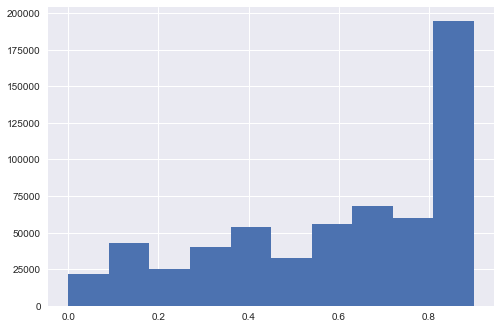


The Histogram for Numeric Variale ps_reg_02


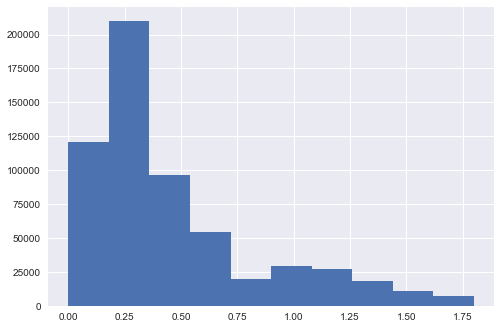


The Histogram for Numeric Variale ps_reg_03


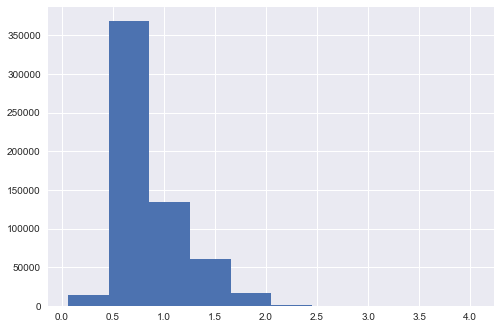


The Histogram for Numeric Variale ps_car_12


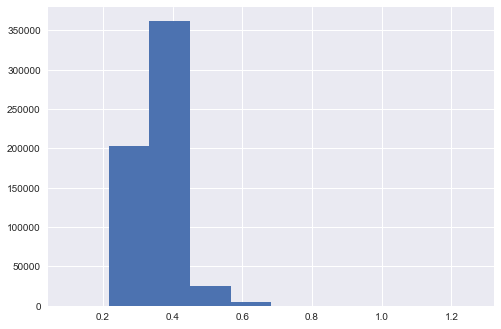


The Histogram for Numeric Variale ps_car_13


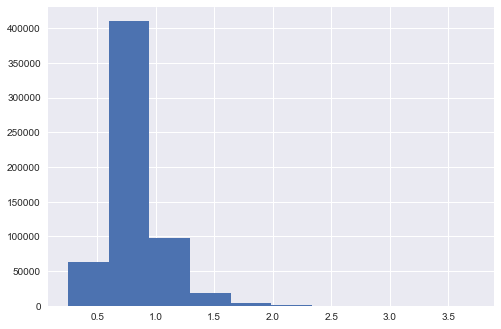


The Histogram for Numeric Variale ps_car_14


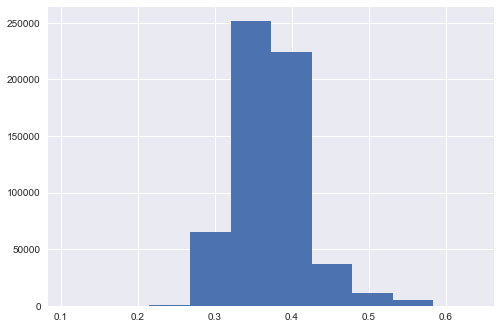


The Histogram for Numeric Variale ps_car_15


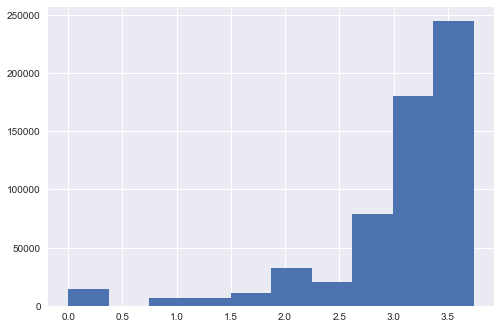


The Histogram for Numeric Variale ps_calc_01


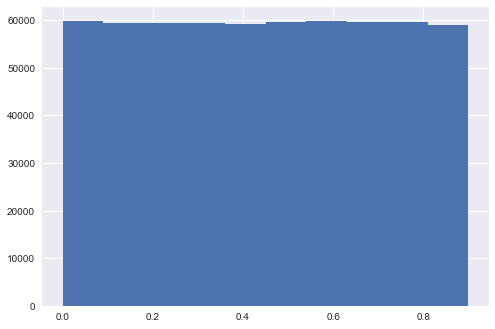


The Histogram for Numeric Variale ps_calc_02


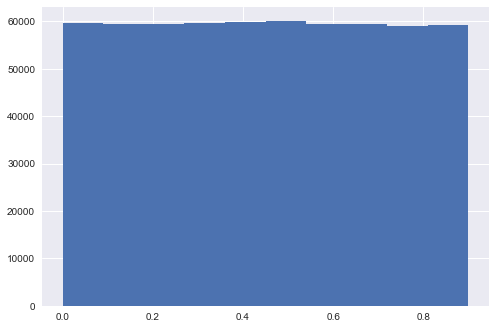


The Histogram for Numeric Variale ps_calc_03


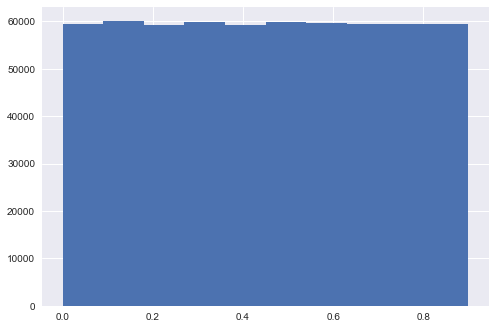


The Histogram for Numeric Variale ps_calc_10


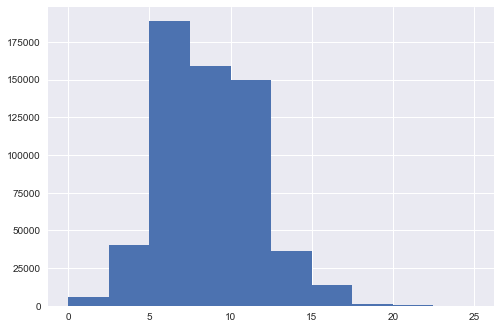


The Histogram for Numeric Variale ps_calc_11


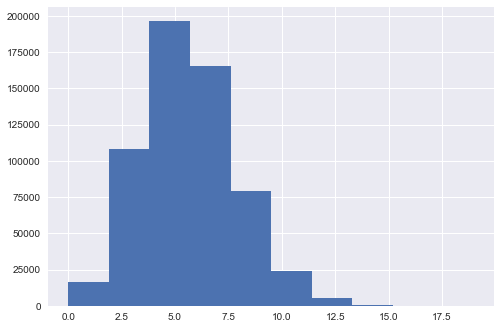


The Histogram for Numeric Variale ps_calc_14


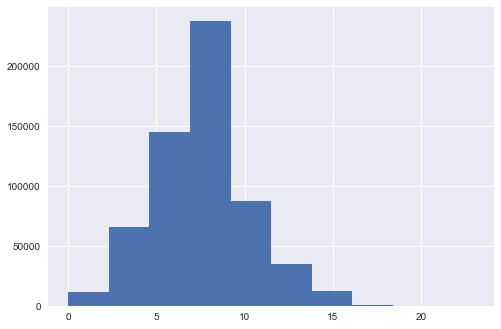

In [12]:
print_histograms(data)

The Boxplot for Numeric Variale ps_reg_01


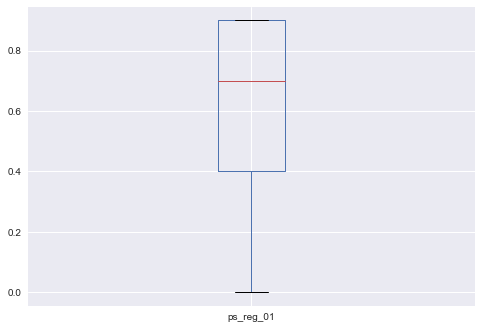


The Boxplot for Numeric Variale ps_reg_02


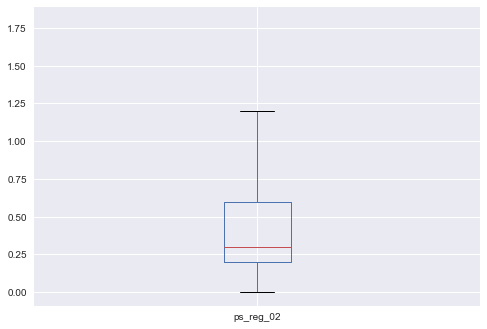


The Boxplot for Numeric Variale ps_reg_03


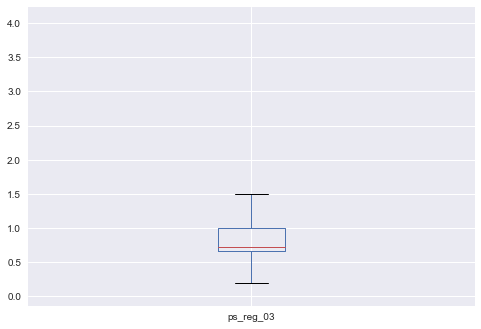


The Boxplot for Numeric Variale ps_car_12


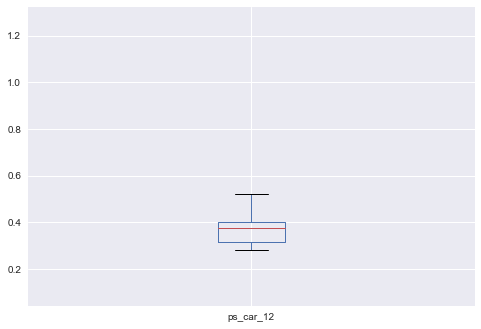


The Boxplot for Numeric Variale ps_car_13


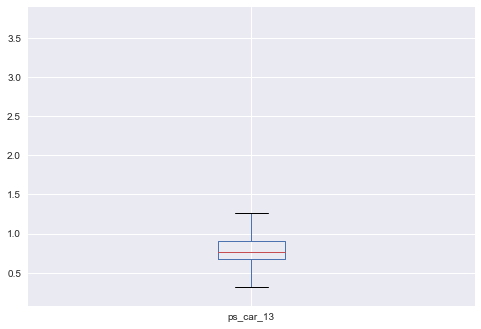


The Boxplot for Numeric Variale ps_car_14


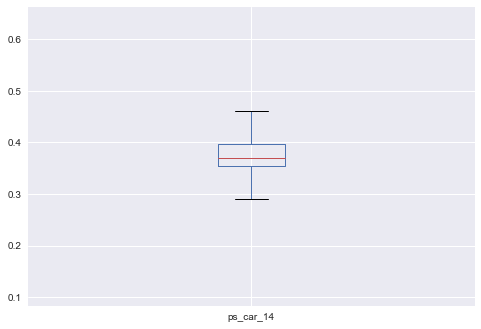


The Boxplot for Numeric Variale ps_car_15


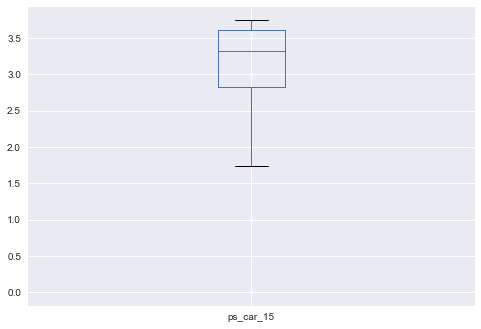


The Boxplot for Numeric Variale ps_calc_01


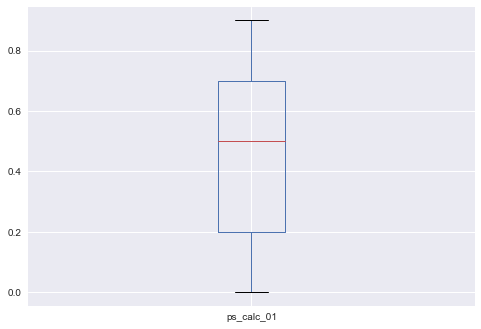


The Boxplot for Numeric Variale ps_calc_02


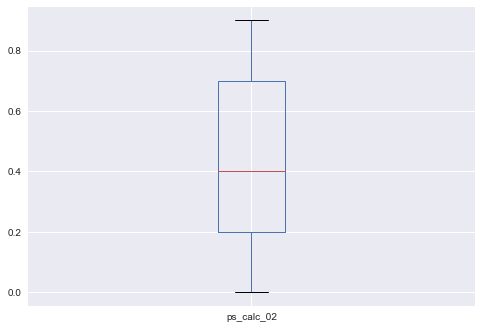


The Boxplot for Numeric Variale ps_calc_03


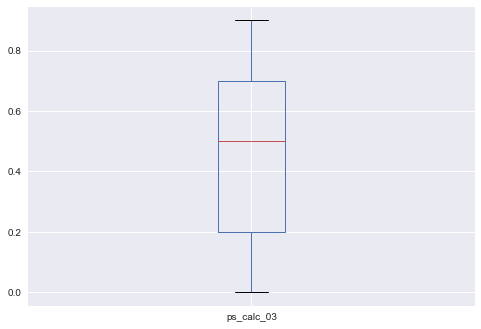


The Boxplot for Numeric Variale ps_calc_10


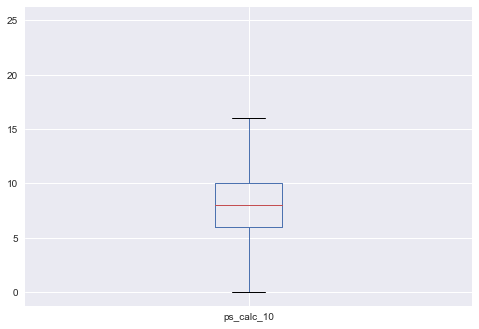


The Boxplot for Numeric Variale ps_calc_11


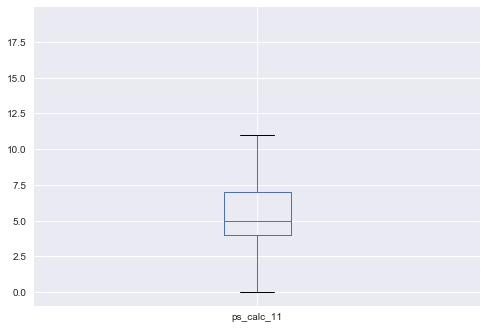


The Boxplot for Numeric Variale ps_calc_14


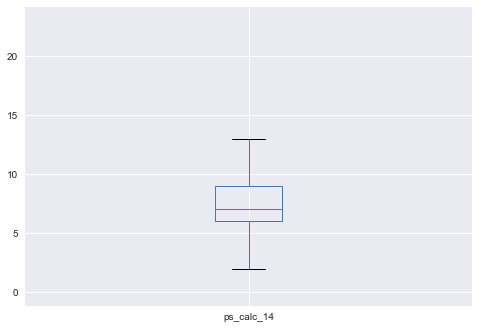

In [13]:
print_boxplot(data)

The Histogram for Numeric Variale ps_reg_01 over Target Variable Classes


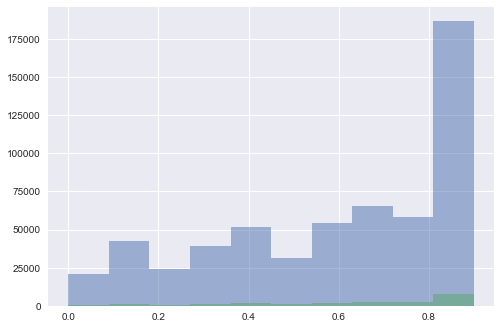


The Histogram for Numeric Variale ps_reg_02 over Target Variable Classes


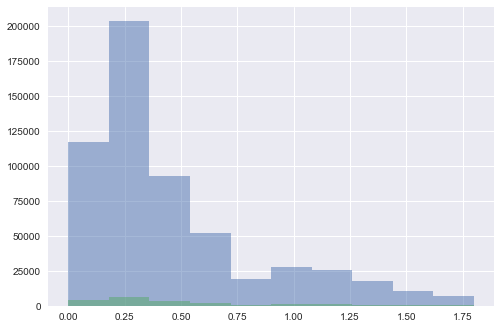


The Histogram for Numeric Variale ps_reg_03 over Target Variable Classes


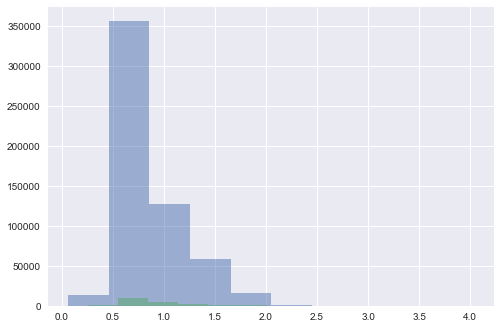


The Histogram for Numeric Variale ps_car_12 over Target Variable Classes


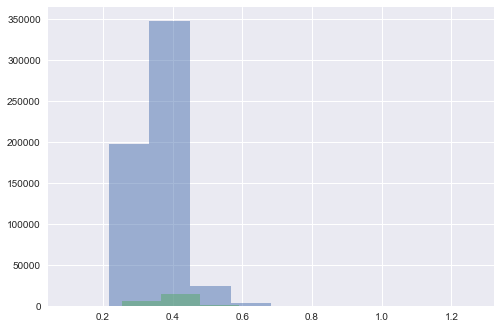


The Histogram for Numeric Variale ps_car_13 over Target Variable Classes


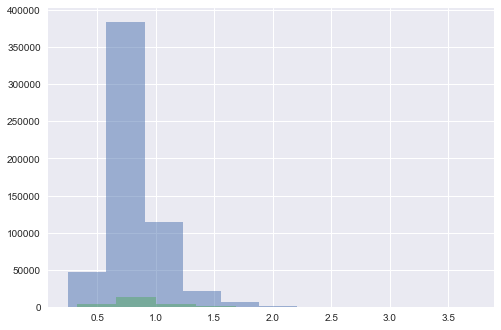


The Histogram for Numeric Variale ps_car_14 over Target Variable Classes


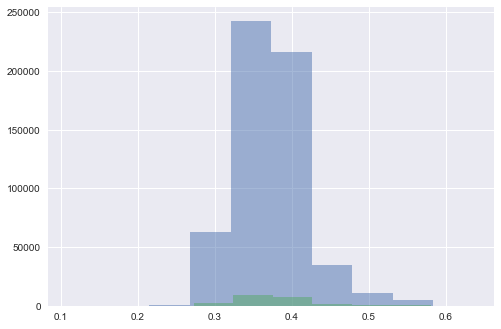


The Histogram for Numeric Variale ps_car_15 over Target Variable Classes


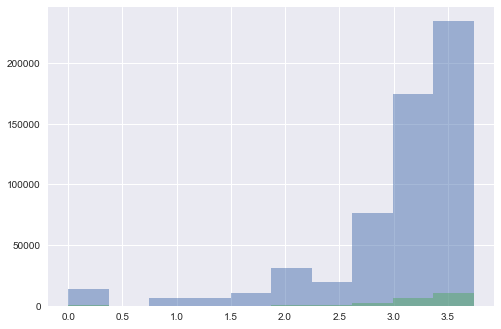


The Histogram for Numeric Variale ps_calc_01 over Target Variable Classes


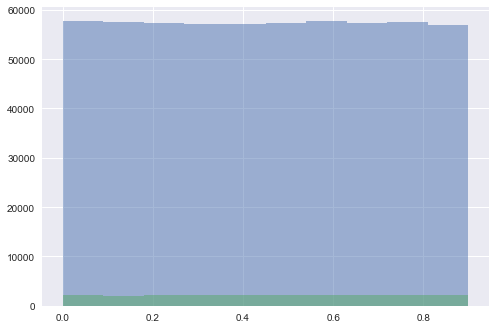


The Histogram for Numeric Variale ps_calc_02 over Target Variable Classes


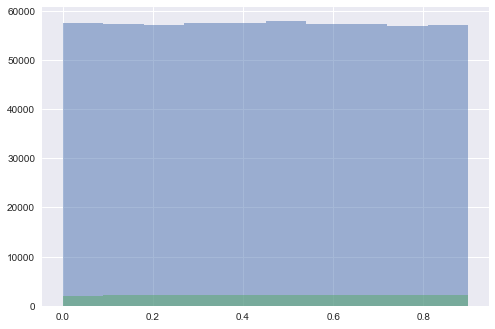


The Histogram for Numeric Variale ps_calc_03 over Target Variable Classes


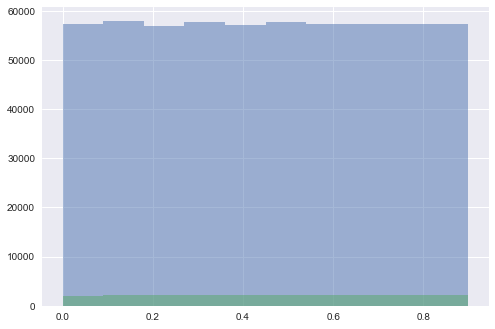


The Histogram for Numeric Variale ps_calc_10 over Target Variable Classes


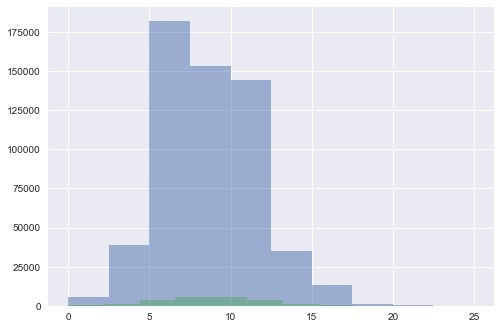


The Histogram for Numeric Variale ps_calc_11 over Target Variable Classes


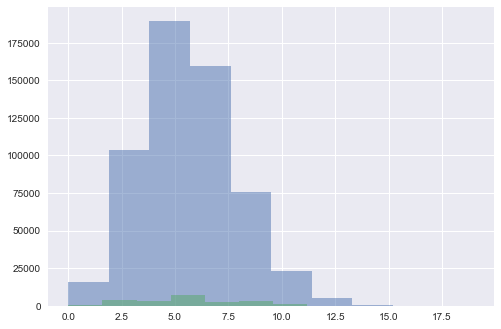


The Histogram for Numeric Variale ps_calc_14 over Target Variable Classes


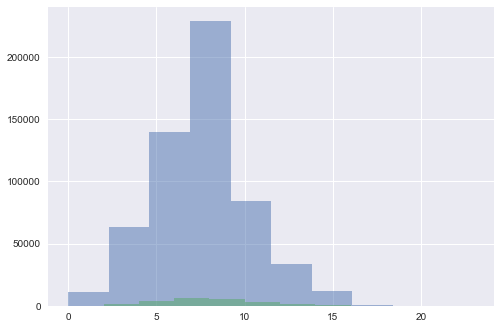

In [14]:
print_histograms_overclasses(data,"target")

The Density for Numeric Variale ps_reg_01 over Target Variable Classes


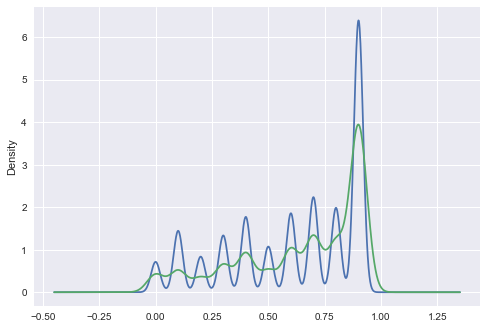


The Density for Numeric Variale ps_reg_02 over Target Variable Classes


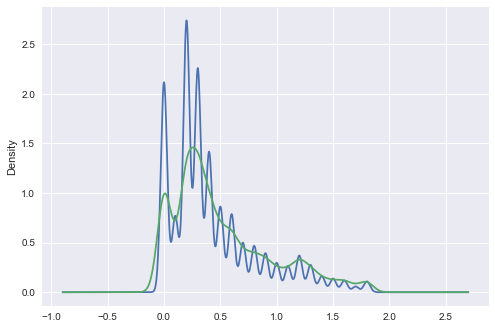


The Density for Numeric Variale ps_reg_03 over Target Variable Classes


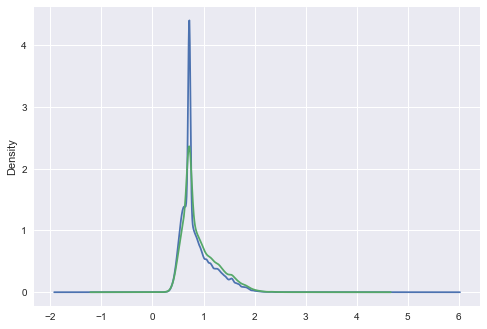


The Density for Numeric Variale ps_car_12 over Target Variable Classes


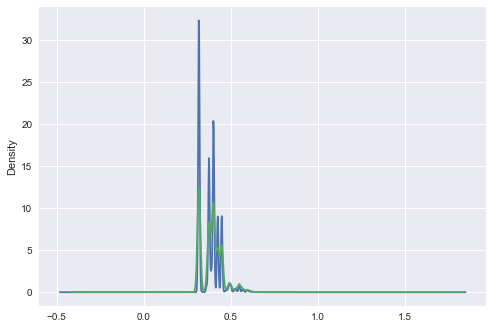


The Density for Numeric Variale ps_car_13 over Target Variable Classes


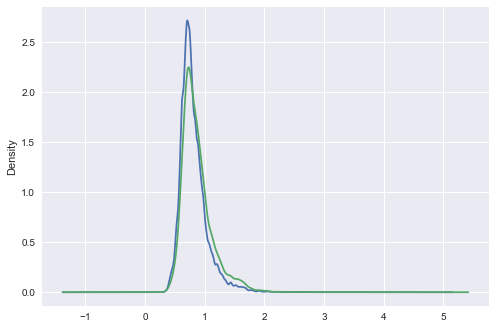


The Density for Numeric Variale ps_car_14 over Target Variable Classes


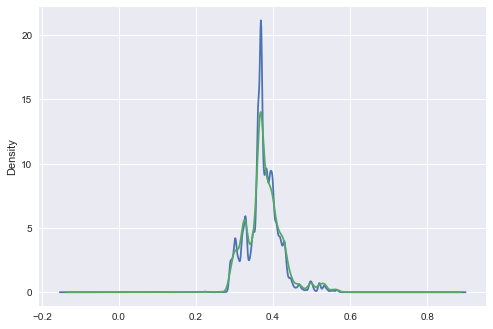


The Density for Numeric Variale ps_car_15 over Target Variable Classes


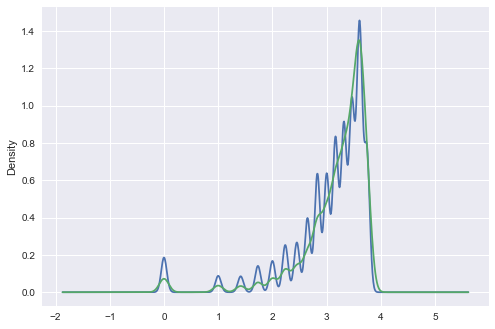


The Density for Numeric Variale ps_calc_01 over Target Variable Classes


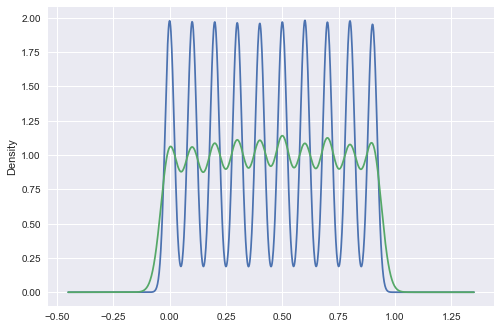


The Density for Numeric Variale ps_calc_02 over Target Variable Classes


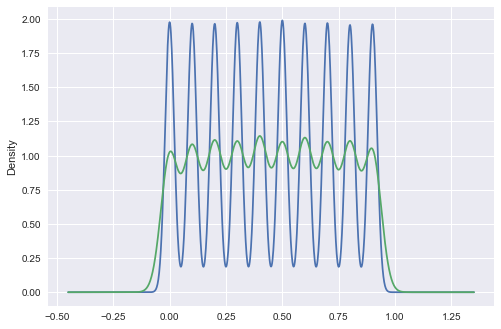


The Density for Numeric Variale ps_calc_03 over Target Variable Classes


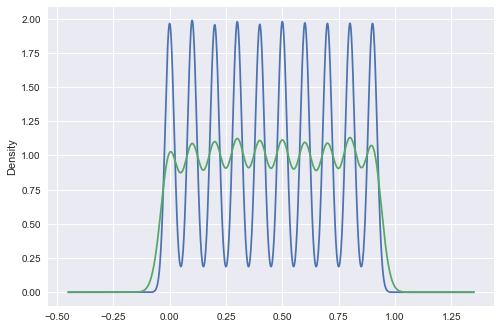


The Density for Numeric Variale ps_calc_10 over Target Variable Classes


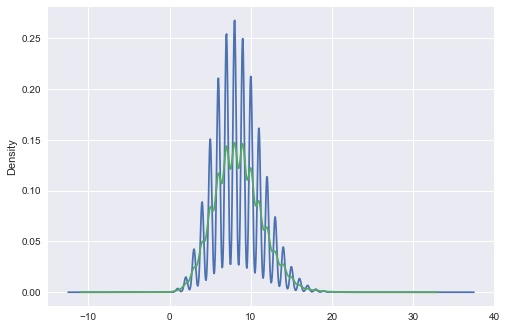


The Density for Numeric Variale ps_calc_11 over Target Variable Classes


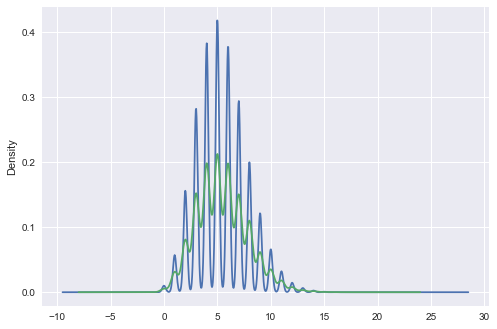


The Density for Numeric Variale ps_calc_14 over Target Variable Classes


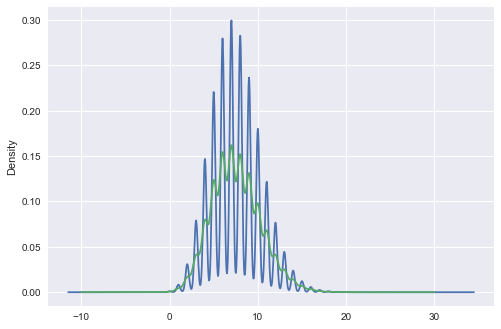

In [15]:
print_density_overclasses(data,"target")

In [13]:
# Check the correaltionship among the numeric variables
num_names = [name for name in data.columns if (data[name].dtype == 'int64') or (data[name].dtype == 'float64')]
num_data = data[num_names]
corrs = num_data.corr()
corrs[corrs!=1].max()

ps_reg_01     0.471027
ps_reg_02     0.742033
ps_reg_03     0.742033
ps_car_12     0.672014
ps_car_13     0.672014
ps_car_14     0.575078
ps_car_15     0.529519
ps_calc_01    0.001347
ps_calc_02    0.002948
ps_calc_03    0.002948
ps_calc_10    0.001785
ps_calc_11    0.001877
ps_calc_14    0.001252
dtype: float64

In [14]:
pd.DataFrame(corrs)

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_10,ps_calc_11,ps_calc_14
ps_reg_01,1.000000,0.471027,0.265476,0.018782,0.027097,-0.001551,0.002765,-0.000891,0.002194,-0.001538,-0.001007,-0.000433,-0.000177
ps_reg_02,0.471027,1.000000,0.742033,0.171453,0.194316,0.053264,0.054510,0.001347,-0.000770,0.000022,0.000190,0.000296,-0.001903
ps_reg_03,0.265476,0.742033,1.000000,0.200490,0.235653,0.073702,0.078496,0.000335,0.000074,0.001381,0.001394,0.000105,-0.001253
ps_car_12,0.018782,0.171453,0.200490,1.000000,0.672014,0.575078,0.049740,-0.000721,-0.000393,0.000151,0.000251,-0.001438,-0.000357
ps_car_13,0.027097,0.194316,0.235653,0.672014,1.000000,0.430810,0.529519,0.000157,0.000040,-0.000200,0.001044,0.000415,-0.000574
ps_car_14,-0.001551,0.053264,0.073702,0.575078,0.430810,1.000000,0.007885,-0.003180,-0.001763,-0.001049,0.001785,0.001877,-0.001016
ps_car_15,0.002765,0.054510,0.078496,0.049740,0.529519,0.007885,1.000000,0.000344,-0.000252,-0.001043,-0.000641,0.001074,0.001172
ps_calc_01,-0.000891,0.001347,0.000335,-0.000721,0.000157,-0.003180,0.000344,1.000000,-0.002418,0.000526,-0.000405,-0.001482,0.000708
ps_calc_02,0.002194,-0.000770,0.000074,-0.000393,0.000040,-0.001763,-0.000252,-0.002418,1.000000,0.002948,-0.000503,-0.000862,0.000333
ps_calc_03,-0.001538,0.000022,0.001381,0.000151,-0.000200,-0.001049,-0.001043,0.000526,0.002948,1.000000,0.000181,-0.000379,-0.000520


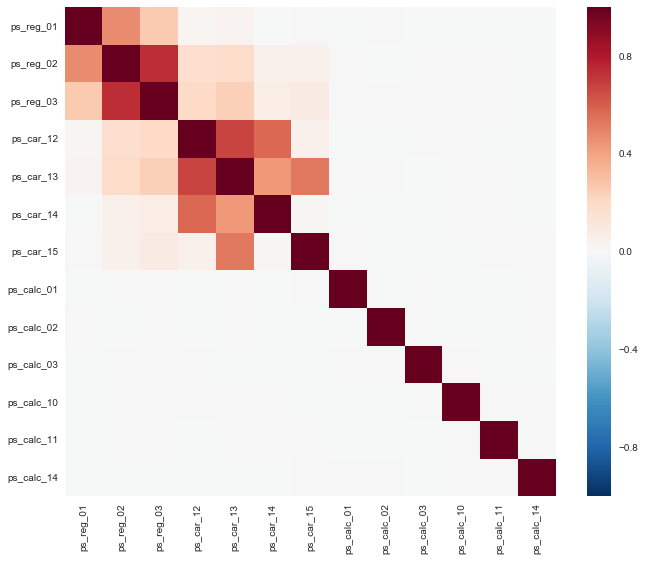

In [18]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corrs)

In [15]:
# Check the correaltionship among the numeric variables
num_names2 = num_names[0:7]
num_data2 = data[num_names2]
corrs2 = num_data2.corr()
corrs2[corrs2!=1].max()

ps_reg_01    0.471027
ps_reg_02    0.742033
ps_reg_03    0.742033
ps_car_12    0.672014
ps_car_13    0.672014
ps_car_14    0.575078
ps_car_15    0.529519
dtype: float64

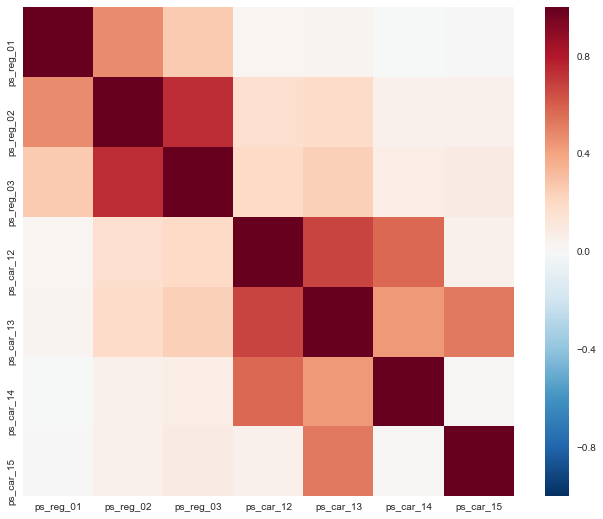

In [20]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corrs2)

In [16]:
pd.DataFrame(corrs2)

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15
ps_reg_01,1.000000,0.471027,0.265476,0.018782,0.027097,-0.001551,0.002765
ps_reg_02,0.471027,1.000000,0.742033,0.171453,0.194316,0.053264,0.054510
ps_reg_03,0.265476,0.742033,1.000000,0.200490,0.235653,0.073702,0.078496
ps_car_12,0.018782,0.171453,0.200490,1.000000,0.672014,0.575078,0.049740
ps_car_13,0.027097,0.194316,0.235653,0.672014,1.000000,0.430810,0.529519
ps_car_14,-0.001551,0.053264,0.073702,0.575078,0.430810,1.000000,0.007885
ps_car_15,0.002765,0.054510,0.078496,0.049740,0.529519,0.007885,1.000000


##### Categorical Variables

In [17]:
# Categorial attributes charateristics
# general distribution 
print ("Categorical attributes distribution:")
data.describe(include=['category']).T

Categorical attributes distribution:


,count,unique,top,freq
target,595212,2,0,573518
ps_ind_01,595212,8,0,187594
ps_ind_02_cat,595212,4,1,432075
ps_ind_03,595212,12,2,96110
ps_ind_04_cat,595212,2,0,347048
ps_ind_05_cat,595212,7,0,533818
ps_ind_06_bin,595212,2,0,360852
ps_ind_07_bin,595212,2,0,442223
ps_ind_08_bin,595212,2,0,497644
ps_ind_09_bin,595212,2,0,484917


In [18]:
# Categorical 
# histogram over differnt target variable
def print_bar(dataset):
    names = dataset.select_dtypes(include=['category']).columns
    for name in names:
        crosstab = pd.crosstab(index=dataset[name],columns="count")
        print ("\nFrequency Table for Categorical Attribute: {}".format(name))
        print (crosstab)
        print ("\nBar Chart for Categorical Attribute: {}".format(name))
        plt.show(crosstab.plot(kind="bar"))
        
def print_crosstab_bar (dataset, target):
    names = dataset.select_dtypes(include=['category']).columns
    names = names[1:]
    for name in names:
        crosstab = pd.crosstab(dataset[target],dataset[name])
        crosstabratio = crosstab/crosstab.sum()
        print ("\nThe cross tablulation (portion) of {} over {}".format(target,name))
        print (crosstabratio)
        print ("\nBar Chart of {} over Categorical Attribute: {}".format(target,name))
        plt.show(crosstabratio.plot(kind="bar"))


The cross tablulation (portion) of target over ps_ind_01
ps_ind_01         0         1         2         3         4         5  \
target                                                                  
0          0.966779  0.966371  0.963137  0.959037  0.954868  0.959684   
1          0.033221  0.033629  0.036863  0.040963  0.045132  0.040316   

ps_ind_01         6         7  
target                         
0          0.956849  0.957869  
1          0.043151  0.042131  

Bar Chart of target over Categorical Attribute: ps_ind_01


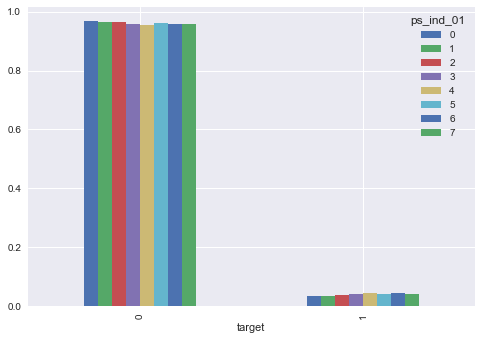


The cross tablulation (portion) of target over ps_ind_02_cat
ps_ind_02_cat         1         2         3        4
target                                              
0              0.964201  0.961861  0.962783  0.95922
1              0.035799  0.038139  0.037217  0.04078

Bar Chart of target over Categorical Attribute: ps_ind_02_cat


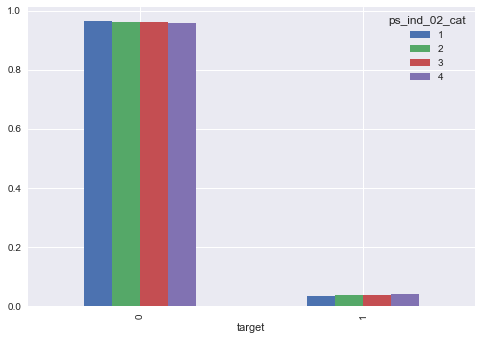


The cross tablulation (portion) of target over ps_ind_03
ps_ind_03        0         1        2         3         4        5       6   \
target                                                                        
0          0.937154  0.962864  0.96966  0.970441  0.966837  0.96118  0.9582   
1          0.062846  0.037136  0.03034  0.029559  0.033163  0.03882  0.0418   

ps_ind_03        7         8         9         10        11  
target                                                       
0          0.958578  0.961051  0.964617  0.959473  0.958926  
1          0.041422  0.038949  0.035383  0.040527  0.041074  

Bar Chart of target over Categorical Attribute: ps_ind_03


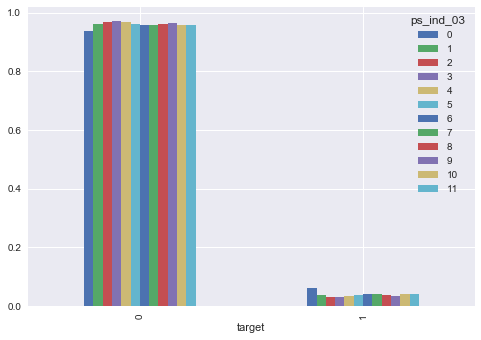


The cross tablulation (portion) of target over ps_ind_04_cat
ps_ind_04_cat         0         1
target                           
0              0.965123  0.961356
1              0.034877  0.038644

Bar Chart of target over Categorical Attribute: ps_ind_04_cat


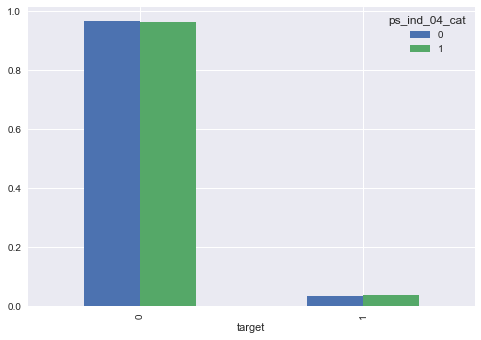


The cross tablulation (portion) of target over ps_ind_05_cat
ps_ind_05_cat         0         1         2         3         4         5  \
target                                                                      
0              0.965597  0.952175  0.924474  0.957002  0.947939  0.951486   
1              0.034403  0.047825  0.075526  0.042998  0.052061  0.048514   

ps_ind_05_cat         6  
target                   
0              0.940664  
1              0.059336  

Bar Chart of target over Categorical Attribute: ps_ind_05_cat


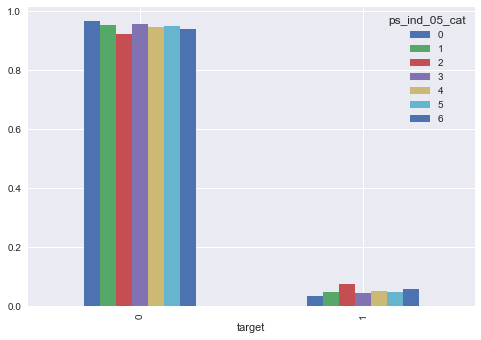


The cross tablulation (portion) of target over ps_ind_06_bin
ps_ind_06_bin         0         1
target                           
0              0.958415  0.971463
1              0.041585  0.028537

Bar Chart of target over Categorical Attribute: ps_ind_06_bin


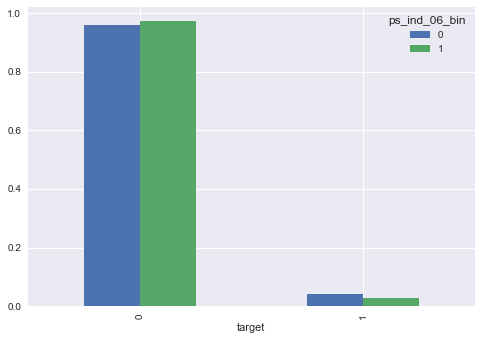


The cross tablulation (portion) of target over ps_ind_07_bin
ps_ind_07_bin         0        1
target                          
0              0.967324  0.95265
1              0.032676  0.04735

Bar Chart of target over Categorical Attribute: ps_ind_07_bin


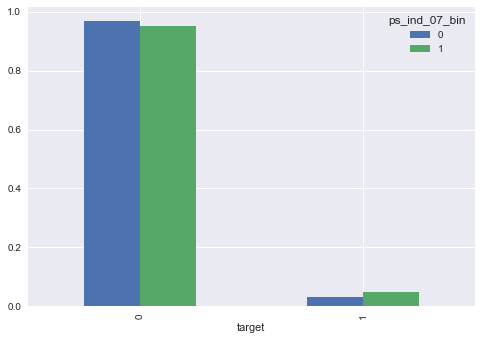


The cross tablulation (portion) of target over ps_ind_08_bin
ps_ind_08_bin         0         1
target                           
0              0.964643  0.957988
1              0.035357  0.042012

Bar Chart of target over Categorical Attribute: ps_ind_08_bin


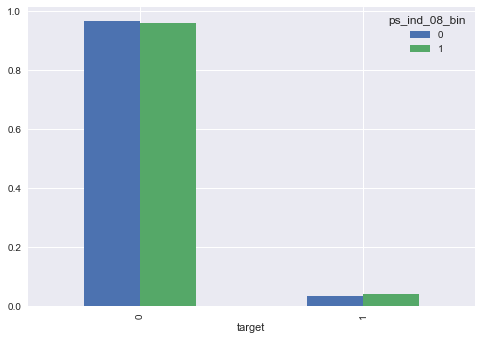


The cross tablulation (portion) of target over ps_ind_09_bin
ps_ind_09_bin         0         1
target                           
0              0.962816  0.966789
1              0.037184  0.033211

Bar Chart of target over Categorical Attribute: ps_ind_09_bin


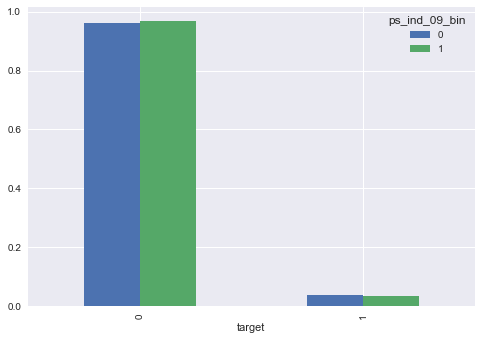


The cross tablulation (portion) of target over ps_ind_10_bin
ps_ind_10_bin         0         1
target                           
0              0.963559  0.945946
1              0.036441  0.054054

Bar Chart of target over Categorical Attribute: ps_ind_10_bin


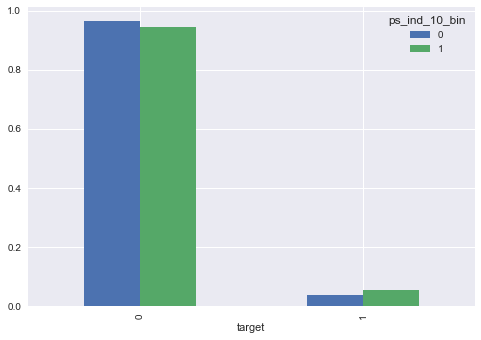


The cross tablulation (portion) of target over ps_ind_11_bin
ps_ind_11_bin         0        1
target                          
0              0.963568  0.95432
1              0.036432  0.04568

Bar Chart of target over Categorical Attribute: ps_ind_11_bin


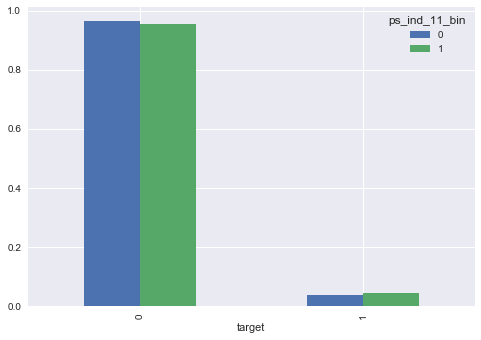


The cross tablulation (portion) of target over ps_ind_12_bin
ps_ind_12_bin         0         1
target                           
0              0.963695  0.948558
1              0.036305  0.051442

Bar Chart of target over Categorical Attribute: ps_ind_12_bin


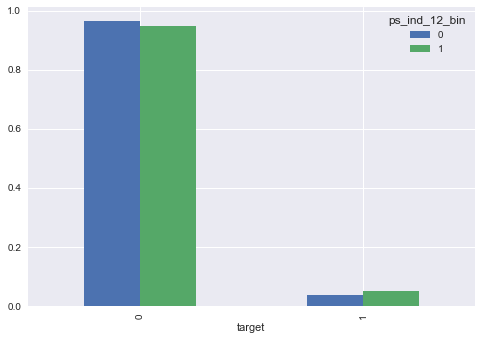


The cross tablulation (portion) of target over ps_ind_13_bin
ps_ind_13_bin         0         1
target                           
0              0.963567  0.948582
1              0.036433  0.051418

Bar Chart of target over Categorical Attribute: ps_ind_13_bin


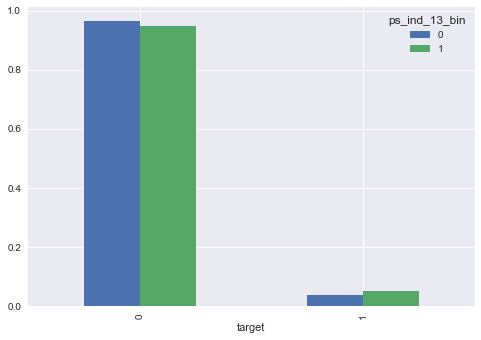


The cross tablulation (portion) of target over ps_ind_14
ps_ind_14         0         1         2         3    4
target                                                
0          0.963699  0.950318  0.951613  0.933824  0.8
1          0.036301  0.049682  0.048387  0.066176  0.2

Bar Chart of target over Categorical Attribute: ps_ind_14


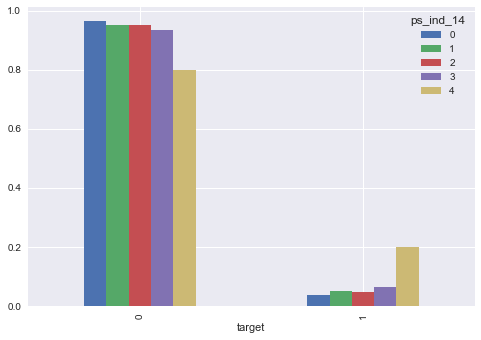


The cross tablulation (portion) of target over ps_ind_15
ps_ind_15        0         1         2         3         4         5   \
target                                                                  
0          0.957205  0.953947  0.955074  0.961199  0.961001  0.960872   
1          0.042795  0.046053  0.044926  0.038801  0.038999  0.039128   

ps_ind_15       6        7        8         9        10       11        12  \
target                                                                       
0          0.96016  0.96065  0.96406  0.969075  0.96544  0.96952  0.969298   
1          0.03984  0.03935  0.03594  0.030925  0.03456  0.03048  0.030702   

ps_ind_15       13  
target              
0          0.96914  
1          0.03086  

Bar Chart of target over Categorical Attribute: ps_ind_15


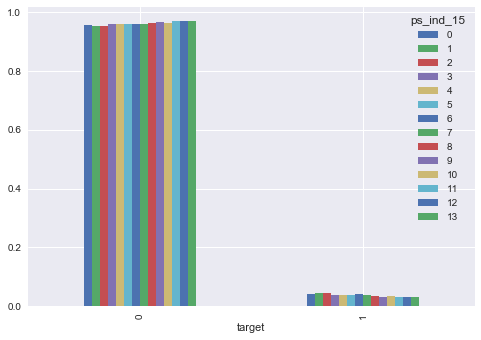


The cross tablulation (portion) of target over ps_ind_16_bin
ps_ind_16_bin         0         1
target                           
0              0.956286  0.967282
1              0.043714  0.032718

Bar Chart of target over Categorical Attribute: ps_ind_16_bin


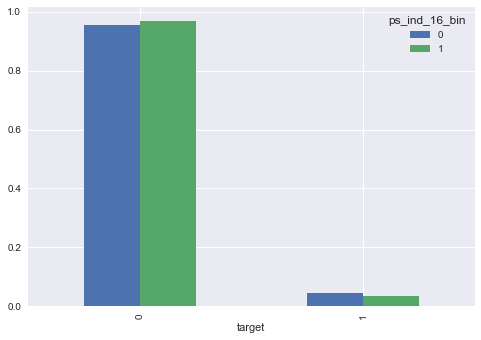


The cross tablulation (portion) of target over ps_ind_17_bin
ps_ind_17_bin        0         1
target                          
0              0.96613  0.944845
1              0.03387  0.055155

Bar Chart of target over Categorical Attribute: ps_ind_17_bin


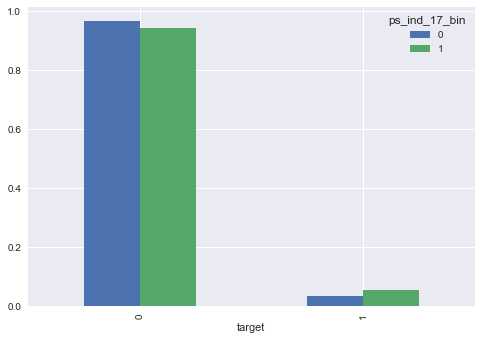


The cross tablulation (portion) of target over ps_ind_18_bin
ps_ind_18_bin         0         1
target                           
0              0.963916  0.961547
1              0.036084  0.038453

Bar Chart of target over Categorical Attribute: ps_ind_18_bin


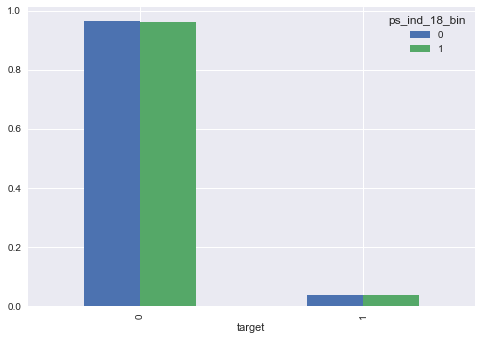


The cross tablulation (portion) of target over ps_car_01_cat
ps_car_01_cat        0         1        2         3         4         5   \
target                                                                     
0              0.956131  0.953182  0.95709  0.962451  0.960839  0.960754   
1              0.043869  0.046818  0.04291  0.037549  0.039161  0.039246   

ps_car_01_cat        6        7         8         9         10        11  
target                                                                    
0              0.970237  0.97123  0.956602  0.945579  0.963024  0.958277  
1              0.029763  0.02877  0.043398  0.054421  0.036976  0.041723  

Bar Chart of target over Categorical Attribute: ps_car_01_cat


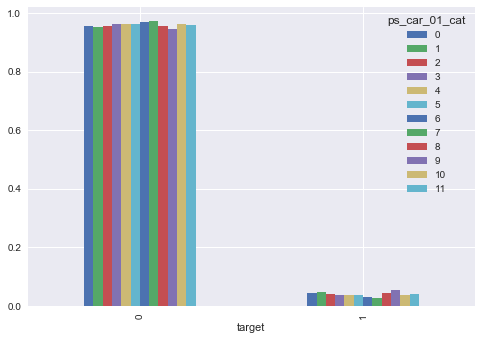


The cross tablulation (portion) of target over ps_car_02_cat
ps_car_02_cat         0         1
target                           
0              0.950493  0.966228
1              0.049507  0.033772

Bar Chart of target over Categorical Attribute: ps_car_02_cat


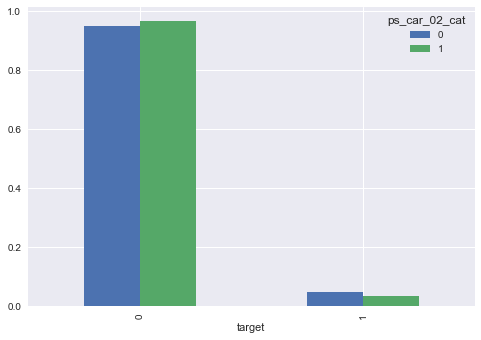


The cross tablulation (portion) of target over ps_car_04_cat
ps_car_04_cat         0         1         2         3         4        5  \
target                                                                     
0              0.966549  0.951175  0.952798  0.948438  0.978261  0.92844   
1              0.033451  0.048825  0.047202  0.051562  0.021739  0.07156   

ps_car_04_cat         6         7         8         9  
target                                                 
0              0.941026  0.906475  0.949849  0.938111  
1              0.058974  0.093525  0.050151  0.061889  

Bar Chart of target over Categorical Attribute: ps_car_04_cat


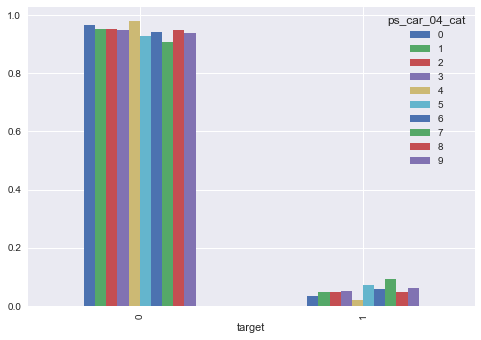


The cross tablulation (portion) of target over ps_car_06_cat
ps_car_06_cat        0         1         2         3         4         5   \
target                                                                      
0              0.966627  0.965815  0.934039  0.961824  0.966149  0.932905   
1              0.033373  0.034185  0.065961  0.038176  0.033851  0.067095   

ps_car_06_cat      6         7         8         9         10       11  \
target                                                                   
0              0.9632  0.961196  0.930595  0.944996  0.955896  0.96828   
1              0.0368  0.038804  0.069405  0.055004  0.044104  0.03172   

ps_car_06_cat        12        13        14        15        16       17  
target                                                                    
0              0.951383  0.943004  0.965706  0.948877  0.954823  0.93617  
1              0.048617  0.056996  0.034294  0.051123  0.045177  0.06383  

Bar Chart of target over Catego

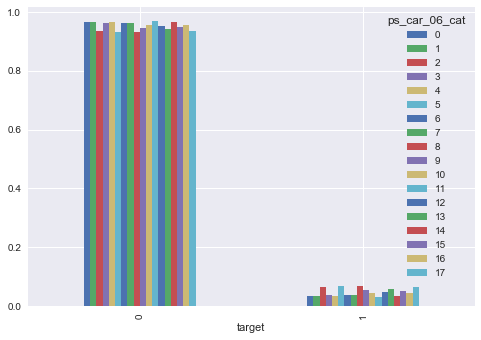


The cross tablulation (portion) of target over ps_car_07_cat
ps_car_07_cat         0         1
target                           
0              0.948814  0.964351
1              0.051186  0.035649

Bar Chart of target over Categorical Attribute: ps_car_07_cat


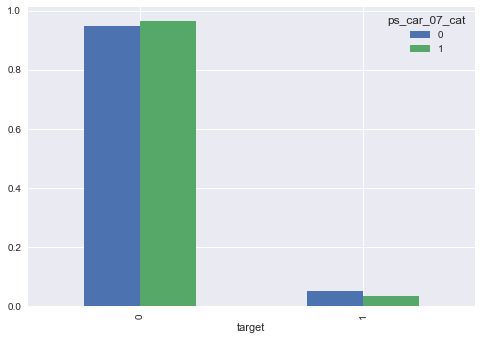


The cross tablulation (portion) of target over ps_car_08_cat
ps_car_08_cat         0         1
target                           
0              0.955067  0.965265
1              0.044933  0.034735

Bar Chart of target over Categorical Attribute: ps_car_08_cat


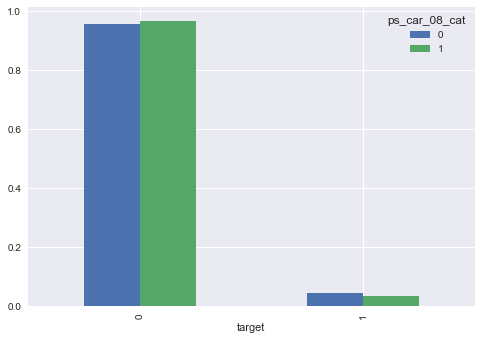


The cross tablulation (portion) of target over ps_car_09_cat
ps_car_09_cat         0         1         2         3       4
target                                                       
0              0.966656  0.943054  0.963593  0.964896  0.9487
1              0.033344  0.056946  0.036407  0.035104  0.0513

Bar Chart of target over Categorical Attribute: ps_car_09_cat


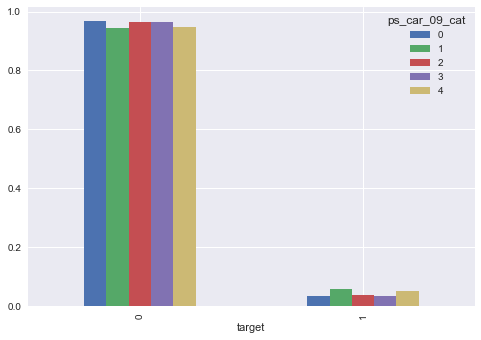


The cross tablulation (portion) of target over ps_car_10_cat
ps_car_10_cat         0         1         2
target                                     
0              0.965617  0.963536  0.960227
1              0.034383  0.036464  0.039773

Bar Chart of target over Categorical Attribute: ps_car_10_cat


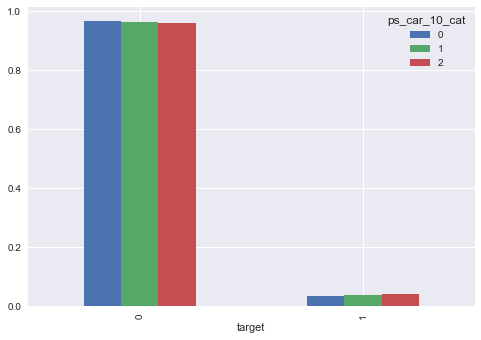


The cross tablulation (portion) of target over ps_car_11_cat
ps_car_11_cat       1         2         3         4         5         6    \
target                                                                      
0              0.959472  0.962005  0.948823  0.939223  0.958044  0.962903   
1              0.040528  0.037995  0.051177  0.060777  0.041956  0.037097   

ps_car_11_cat       7         8         9         10     ...          95   \
target                                                   ...                
0              0.974527  0.962515  0.971958  0.974347    ...     0.972456   
1              0.025473  0.037485  0.028042  0.025653    ...     0.027544   

ps_car_11_cat      96        97        98        99        100       101  \
target                                                                     
0              0.96768  0.940701  0.969123  0.976997  0.947582  0.961711   
1              0.03232  0.059299  0.030877  0.023003  0.052418  0.038289   

ps_car_11_cat  

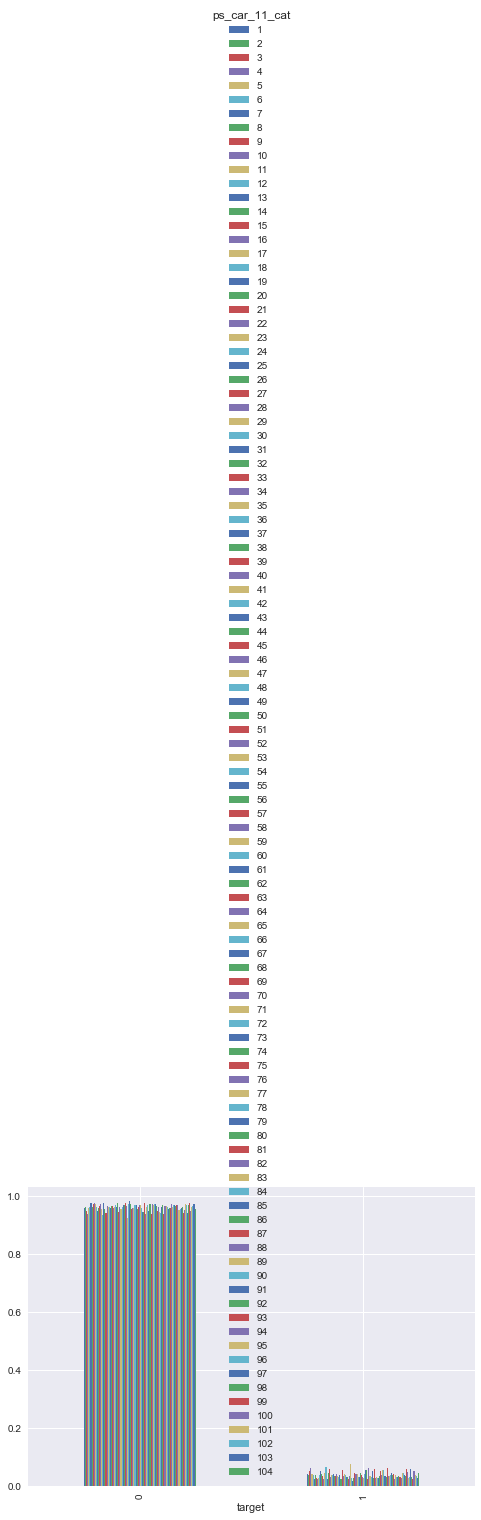


The cross tablulation (portion) of target over ps_car_11
ps_car_11         0         1         2         3
target                                           
0          0.952931  0.972733  0.961416  0.963932
1          0.047069  0.027267  0.038584  0.036068

Bar Chart of target over Categorical Attribute: ps_car_11


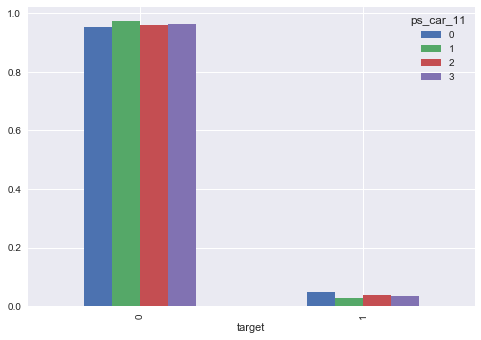


The cross tablulation (portion) of target over ps_calc_04
ps_calc_04         0         1         2         3         4         5
target                                                                
0           0.964244  0.963643  0.963145  0.963797  0.963973  0.961883
1           0.035756  0.036357  0.036855  0.036203  0.036027  0.038117

Bar Chart of target over Categorical Attribute: ps_calc_04


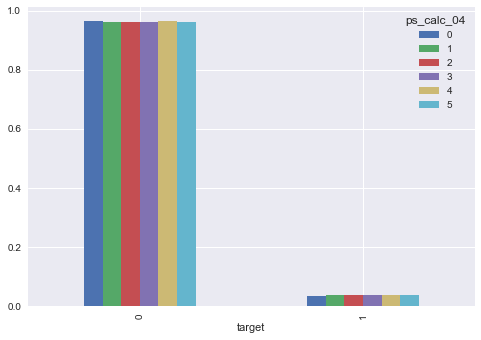


The cross tablulation (portion) of target over ps_calc_05
ps_calc_05         0         1         2         3         4         5  \
target                                                                   
0           0.963806  0.963596  0.963358  0.963991  0.963301  0.961242   
1           0.036194  0.036404  0.036642  0.036009  0.036699  0.038758   

ps_calc_05         6  
target                
0           0.946237  
1           0.053763  

Bar Chart of target over Categorical Attribute: ps_calc_05


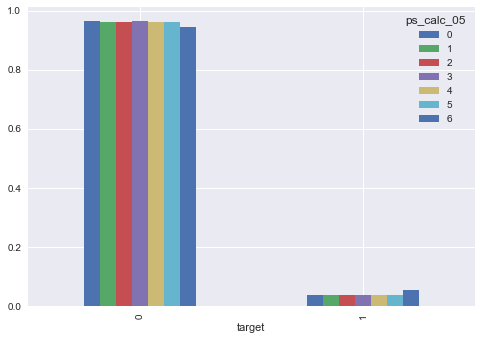


The cross tablulation (portion) of target over ps_calc_06
ps_calc_06   0    1         2         3        4         5         6   \
target                                                                  
0           1.0  1.0  0.977273  0.968307  0.96167  0.964003  0.963608   
1           0.0  0.0  0.022727  0.031693  0.03833  0.035997  0.036392   

ps_calc_06        7         8         9         10  
target                                              
0           0.964027  0.962757  0.963818  0.964187  
1           0.035973  0.037243  0.036182  0.035813  

Bar Chart of target over Categorical Attribute: ps_calc_06


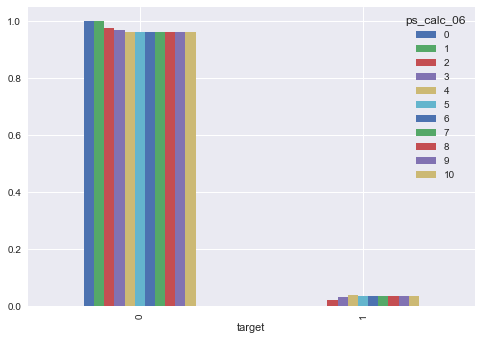


The cross tablulation (portion) of target over ps_calc_07
ps_calc_07         0         1         2         3         4         5  \
target                                                                   
0           0.963702  0.962718  0.963616  0.964036  0.963151  0.964654   
1           0.036298  0.037282  0.036384  0.035964  0.036849  0.035346   

ps_calc_07         6         7         8         9  
target                                              
0           0.961966  0.958913  0.968921  0.913043  
1           0.038034  0.041087  0.031079  0.086957  

Bar Chart of target over Categorical Attribute: ps_calc_07


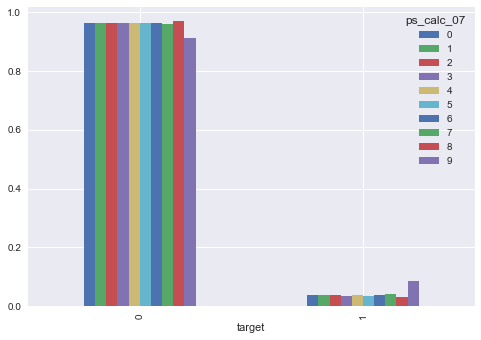


The cross tablulation (portion) of target over ps_calc_08
ps_calc_08   2         3         4        5         6         7        8   \
target                                                                      
0           1.0  0.966667  0.964371  0.96196  0.962521  0.963988  0.96264   
1           0.0  0.033333  0.035629  0.03804  0.037479  0.036012  0.03736   

ps_calc_08        9         10       11        12  
target                                             
0           0.963867  0.964019  0.96316  0.964083  
1           0.036133  0.035981  0.03684  0.035917  

Bar Chart of target over Categorical Attribute: ps_calc_08


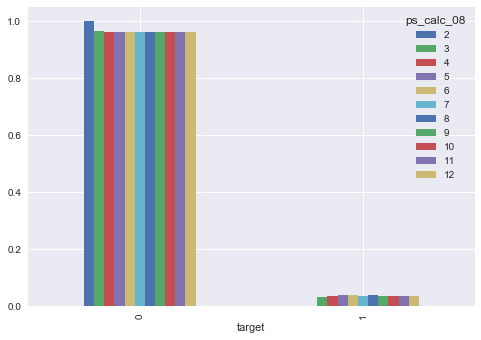


The cross tablulation (portion) of target over ps_calc_09
ps_calc_09         0         1         2         3         4         5  \
target                                                                   
0           0.963195  0.964487  0.963155  0.963462  0.962948  0.964963   
1           0.036805  0.035513  0.036845  0.036538  0.037052  0.035037   

ps_calc_09         6         7  
target                          
0           0.963247  0.965779  
1           0.036753  0.034221  

Bar Chart of target over Categorical Attribute: ps_calc_09


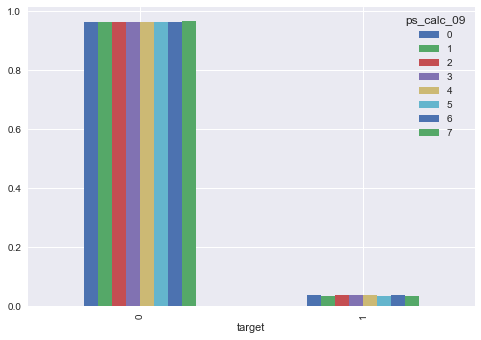


The cross tablulation (portion) of target over ps_calc_12
ps_calc_12        0         1         2         3         4         5   \
target                                                                   
0           0.963241  0.963607  0.963385  0.964123  0.964388  0.962826   
1           0.036759  0.036393  0.036615  0.035877  0.035612  0.037174   

ps_calc_12        6        7         8    9    10  
target                                             
0           0.961717  0.97416  0.954545  1.0  1.0  
1           0.038283  0.02584  0.045455  0.0  0.0  

Bar Chart of target over Categorical Attribute: ps_calc_12


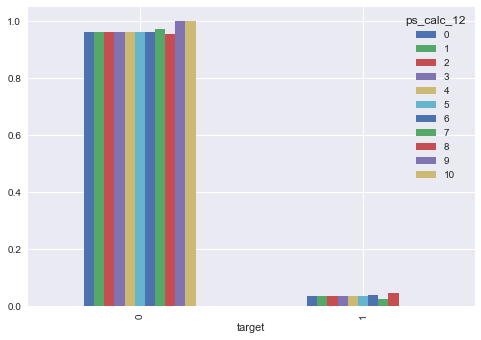


The cross tablulation (portion) of target over ps_calc_13
ps_calc_13        0         1         2         3         4         5   \
target                                                                   
0           0.962654  0.963708  0.963684  0.963636  0.963239  0.963325   
1           0.037346  0.036292  0.036316  0.036364  0.036761  0.036675   

ps_calc_13        6         7         8         9         10        11    12  \
target                                                                         
0           0.964218  0.964737  0.961875  0.965517  0.968661  0.977273  0.95   
1           0.035782  0.035263  0.038125  0.034483  0.031339  0.022727  0.05   

ps_calc_13    13  
target            
0           0.75  
1           0.25  

Bar Chart of target over Categorical Attribute: ps_calc_13


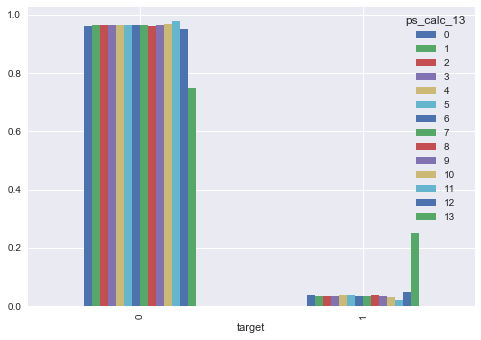


The cross tablulation (portion) of target over ps_calc_15_bin
ps_calc_15_bin         0         1
target                            
0               0.963518  0.963799
1               0.036482  0.036201

Bar Chart of target over Categorical Attribute: ps_calc_15_bin


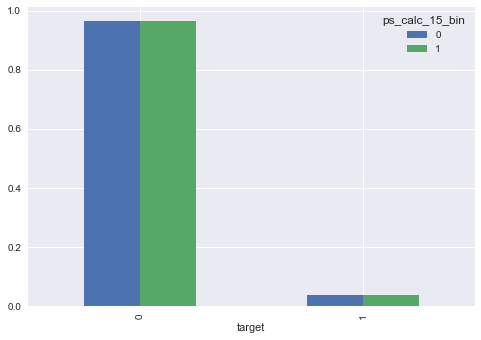


The cross tablulation (portion) of target over ps_calc_16_bin
ps_calc_16_bin         0         1
target                            
0               0.963704  0.963462
1               0.036296  0.036538

Bar Chart of target over Categorical Attribute: ps_calc_16_bin


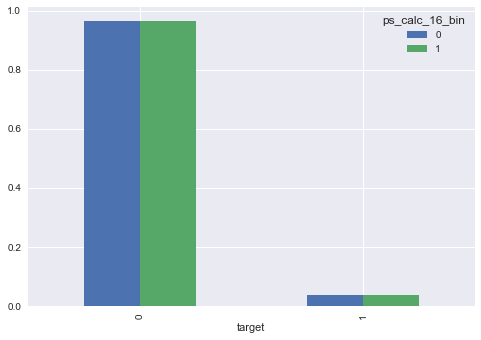


The cross tablulation (portion) of target over ps_calc_17_bin
ps_calc_17_bin         0         1
target                            
0               0.963517  0.963581
1               0.036483  0.036419

Bar Chart of target over Categorical Attribute: ps_calc_17_bin


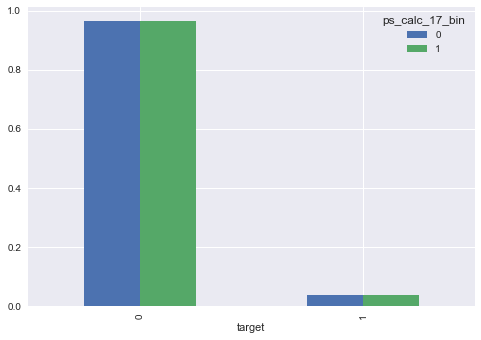


The cross tablulation (portion) of target over ps_calc_18_bin
ps_calc_18_bin         0         1
target                            
0               0.963618  0.963389
1               0.036382  0.036611

Bar Chart of target over Categorical Attribute: ps_calc_18_bin


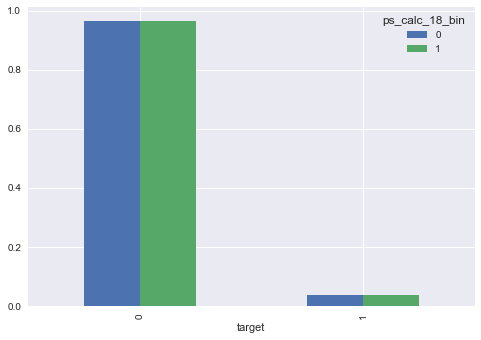


The cross tablulation (portion) of target over ps_calc_19_bin
ps_calc_19_bin         0         1
target                            
0               0.963313  0.963999
1               0.036687  0.036001

Bar Chart of target over Categorical Attribute: ps_calc_19_bin


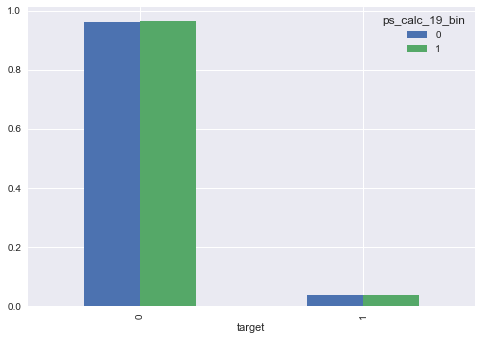


The cross tablulation (portion) of target over ps_calc_20_bin
ps_calc_20_bin         0         1
target                            
0               0.963467  0.964025
1               0.036533  0.035975

Bar Chart of target over Categorical Attribute: ps_calc_20_bin


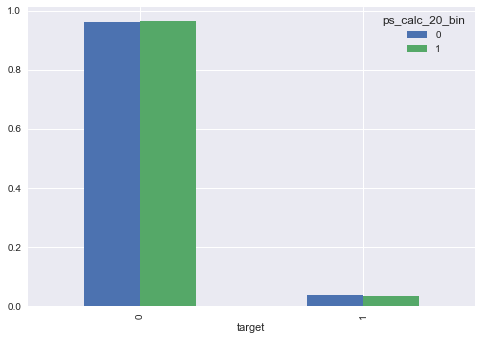

In [24]:
print_crosstab_bar (data, "target")


Frequency Table for Categorical Attribute: target
col_0    count
target        
0       573518
1        21694

Bar Chart for Categorical Attribute: target


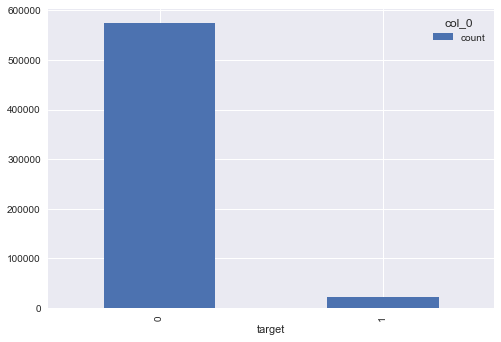


Frequency Table for Categorical Attribute: ps_ind_01
col_0       count
ps_ind_01        
0          187594
1          143984
2           82468
3           51193
4           33524
5           61464
6           17682
7           17303

Bar Chart for Categorical Attribute: ps_ind_01


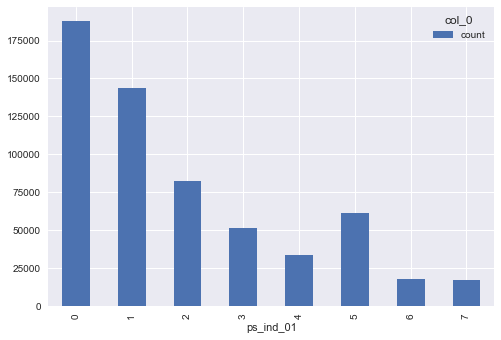


Frequency Table for Categorical Attribute: ps_ind_02_cat
col_0           count
ps_ind_02_cat        
1              432075
2              123573
3               28186
4               11378

Bar Chart for Categorical Attribute: ps_ind_02_cat


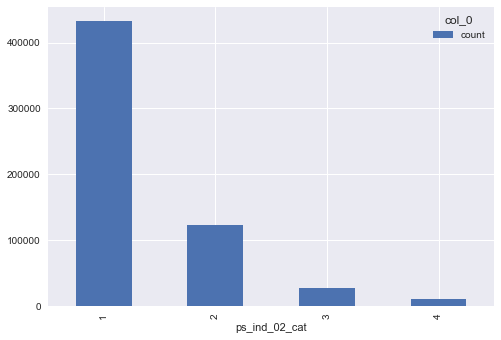


Frequency Table for Categorical Attribute: ps_ind_03
col_0      count
ps_ind_03       
0          15514
1          67994
2          96110
3          81973
4          67213
5          62803
6          60406
7          52364
8          39667
9          25436
10         14484
11         11248

Bar Chart for Categorical Attribute: ps_ind_03


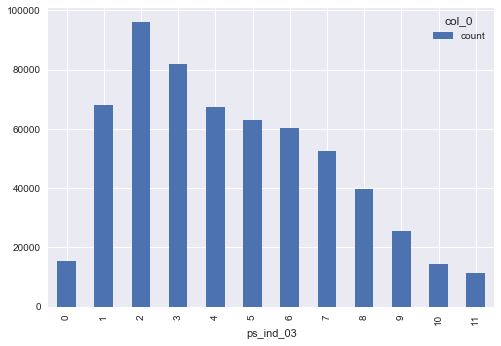


Frequency Table for Categorical Attribute: ps_ind_04_cat
col_0           count
ps_ind_04_cat        
0              347048
1              248164

Bar Chart for Categorical Attribute: ps_ind_04_cat


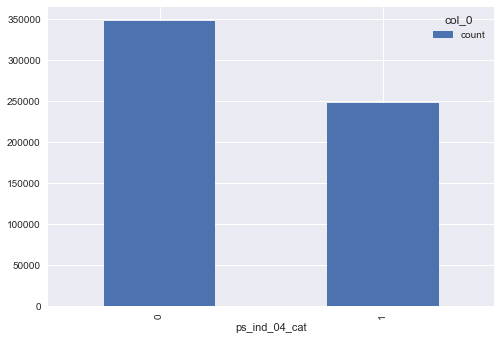


Frequency Table for Categorical Attribute: ps_ind_05_cat
col_0           count
ps_ind_05_cat        
0              533818
1                8322
2                4184
3                8233
4               18344
5                1649
6               20662

Bar Chart for Categorical Attribute: ps_ind_05_cat


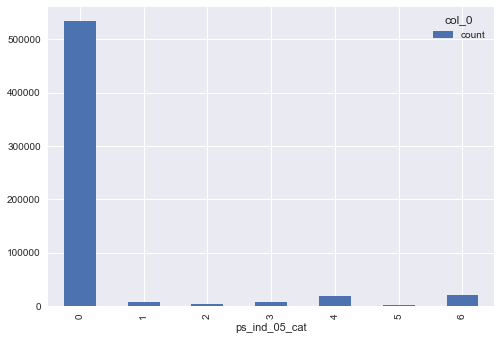


Frequency Table for Categorical Attribute: ps_ind_06_bin
col_0           count
ps_ind_06_bin        
0              360852
1              234360

Bar Chart for Categorical Attribute: ps_ind_06_bin


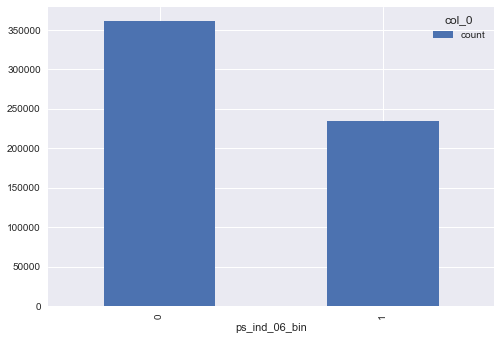


Frequency Table for Categorical Attribute: ps_ind_07_bin
col_0           count
ps_ind_07_bin        
0              442223
1              152989

Bar Chart for Categorical Attribute: ps_ind_07_bin


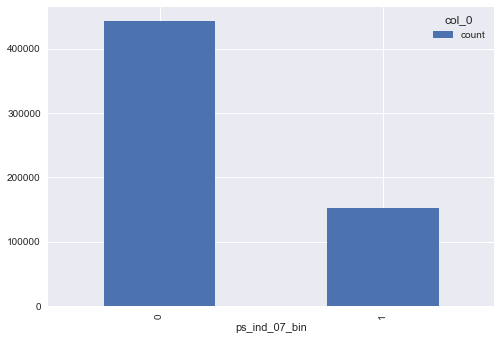


Frequency Table for Categorical Attribute: ps_ind_08_bin
col_0           count
ps_ind_08_bin        
0              497644
1               97568

Bar Chart for Categorical Attribute: ps_ind_08_bin


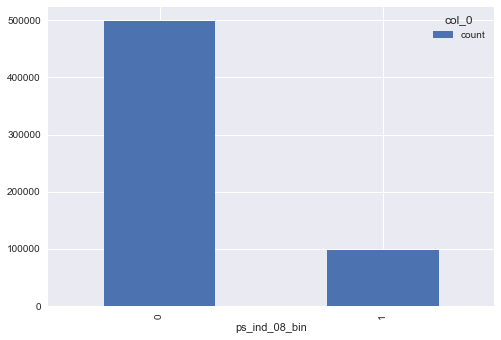


Frequency Table for Categorical Attribute: ps_ind_09_bin
col_0           count
ps_ind_09_bin        
0              484917
1              110295

Bar Chart for Categorical Attribute: ps_ind_09_bin


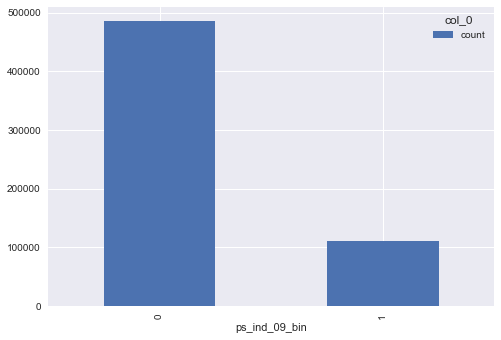


Frequency Table for Categorical Attribute: ps_ind_10_bin
col_0           count
ps_ind_10_bin        
0              594990
1                 222

Bar Chart for Categorical Attribute: ps_ind_10_bin


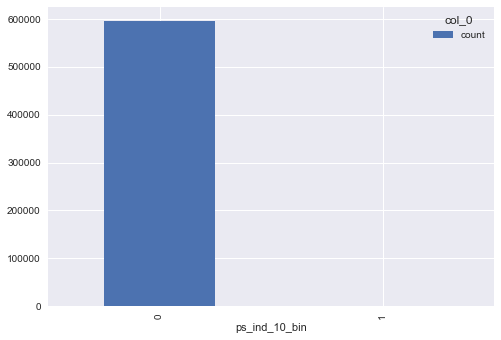


Frequency Table for Categorical Attribute: ps_ind_11_bin
col_0           count
ps_ind_11_bin        
0              594205
1                1007

Bar Chart for Categorical Attribute: ps_ind_11_bin


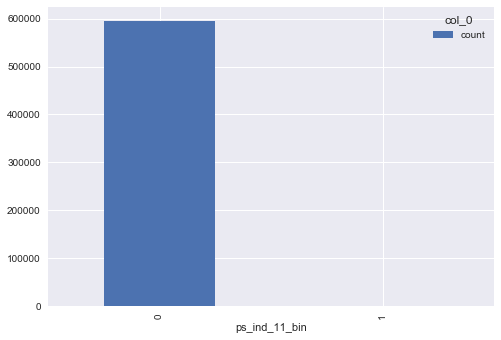


Frequency Table for Categorical Attribute: ps_ind_12_bin
col_0           count
ps_ind_12_bin        
0              589594
1                5618

Bar Chart for Categorical Attribute: ps_ind_12_bin


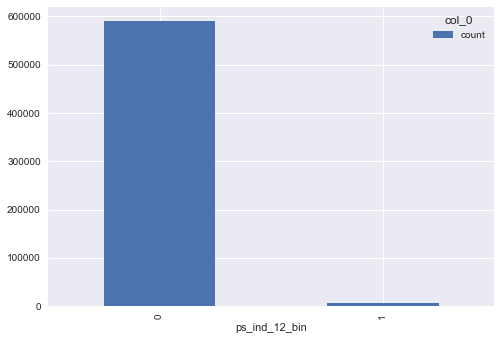


Frequency Table for Categorical Attribute: ps_ind_13_bin
col_0           count
ps_ind_13_bin        
0              594648
1                 564

Bar Chart for Categorical Attribute: ps_ind_13_bin


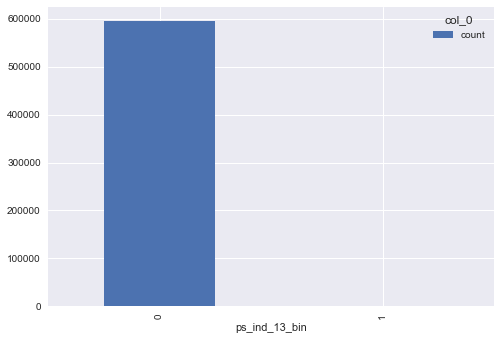


Frequency Table for Categorical Attribute: ps_ind_14
col_0       count
ps_ind_14        
0          588832
1            5495
2             744
3             136
4               5

Bar Chart for Categorical Attribute: ps_ind_14


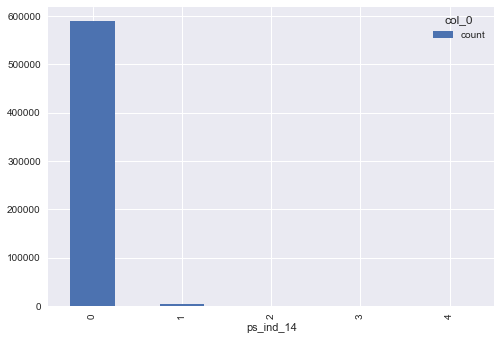


Frequency Table for Categorical Attribute: ps_ind_15
col_0      count
ps_ind_15       
0          31826
1          11617
2          18675
3          32267
4          41770
5          42553
6          58408
7          65336
8          59600
9          45497
10         54341
11         53215
12         44851
13         35256

Bar Chart for Categorical Attribute: ps_ind_15


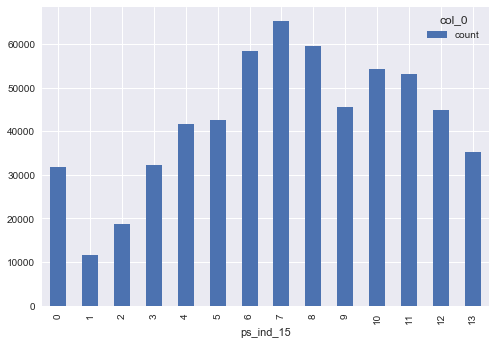


Frequency Table for Categorical Attribute: ps_ind_16_bin
col_0           count
ps_ind_16_bin        
0              201882
1              393330

Bar Chart for Categorical Attribute: ps_ind_16_bin


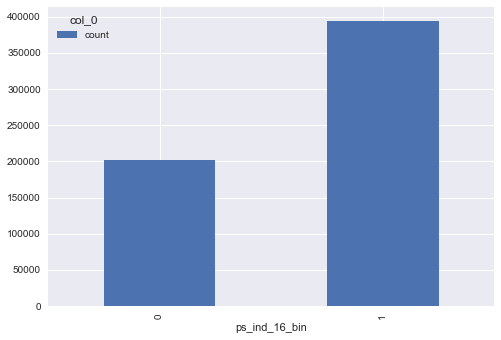


Frequency Table for Categorical Attribute: ps_ind_17_bin
col_0           count
ps_ind_17_bin        
0              523143
1               72069

Bar Chart for Categorical Attribute: ps_ind_17_bin


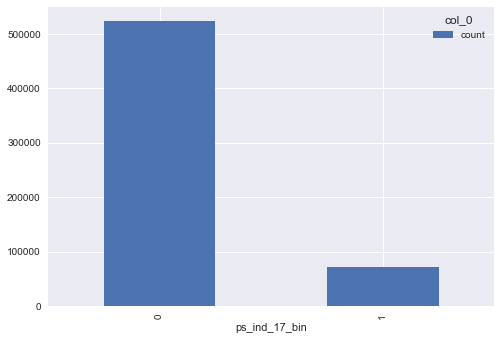


Frequency Table for Categorical Attribute: ps_ind_18_bin
col_0           count
ps_ind_18_bin        
0              503879
1               91333

Bar Chart for Categorical Attribute: ps_ind_18_bin


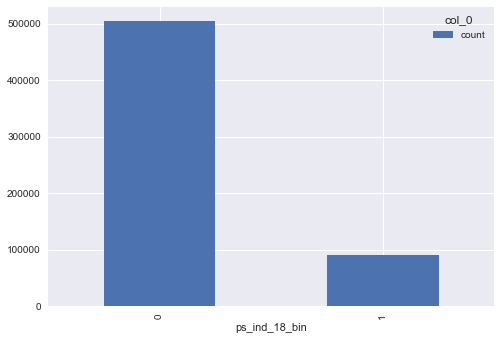


Frequency Table for Categorical Attribute: ps_car_01_cat
col_0           count
ps_car_01_cat        
0                5904
1                1367
2                2144
3                6658
4               26174
5               18142
6               62393
7              179247
8               15093
9               20323
10              50087
11             207680

Bar Chart for Categorical Attribute: ps_car_01_cat


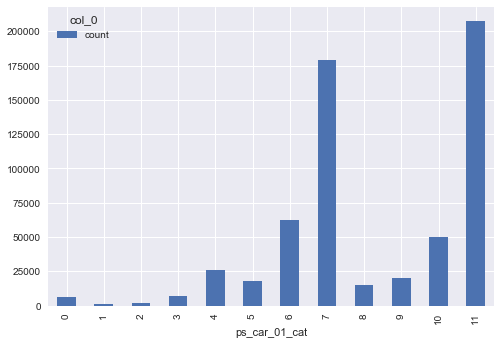


Frequency Table for Categorical Attribute: ps_car_02_cat
col_0           count
ps_car_02_cat        
0              101217
1              493995

Bar Chart for Categorical Attribute: ps_car_02_cat


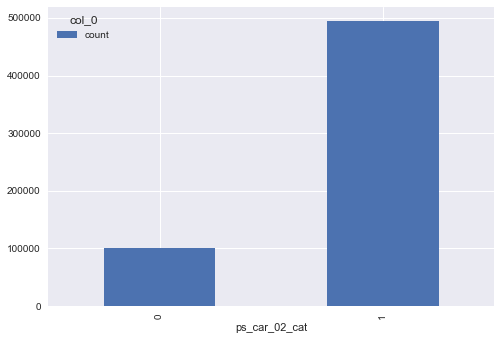


Frequency Table for Categorical Attribute: ps_car_04_cat
col_0           count
ps_car_04_cat        
0              496581
1               32115
2               23770
3                 640
4                 230
5                 545
6                1560
7                 139
8               20598
9               19034

Bar Chart for Categorical Attribute: ps_car_04_cat


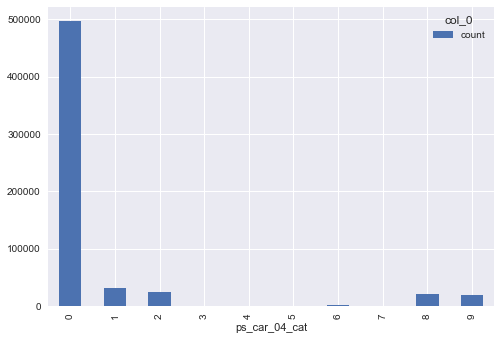


Frequency Table for Categorical Attribute: ps_car_06_cat
col_0           count
ps_car_06_cat        
0              110420
1              118386
2                1607
3               11997
4               31136
5                1401
6               20951
7               16158
8                1412
9               17617
10              33466
11             131527
12               2386
13               6246
14              59253
15              21732
16               4582
17               4935

Bar Chart for Categorical Attribute: ps_car_06_cat


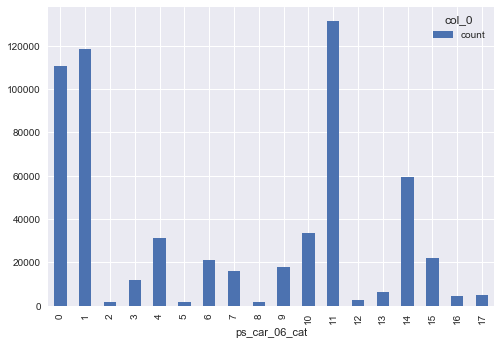


Frequency Table for Categorical Attribute: ps_car_07_cat
col_0           count
ps_car_07_cat        
0               30575
1              564637

Bar Chart for Categorical Attribute: ps_car_07_cat


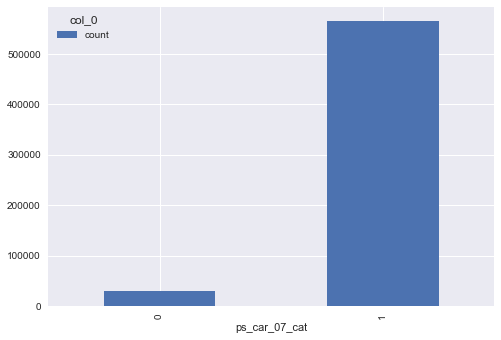


Frequency Table for Categorical Attribute: ps_car_08_cat
col_0           count
ps_car_08_cat        
0               99948
1              495264

Bar Chart for Categorical Attribute: ps_car_08_cat


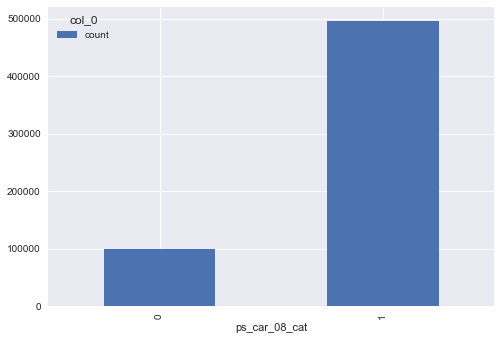


Frequency Table for Categorical Attribute: ps_car_09_cat
col_0           count
ps_car_09_cat        
0              194518
1               29080
2              354051
3               14756
4                2807

Bar Chart for Categorical Attribute: ps_car_09_cat


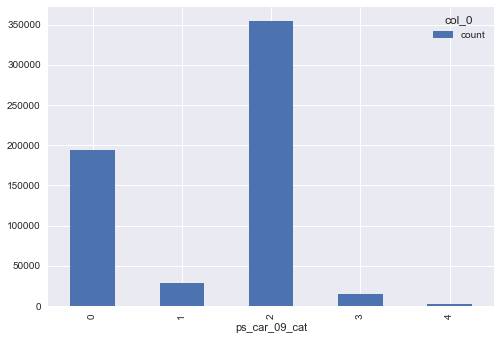


Frequency Table for Categorical Attribute: ps_car_10_cat
col_0           count
ps_car_10_cat        
0                4857
1              590179
2                 176

Bar Chart for Categorical Attribute: ps_car_10_cat


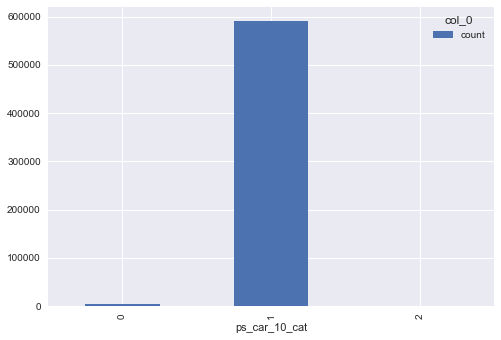


Frequency Table for Categorical Attribute: ps_car_11_cat
col_0          count
ps_car_11_cat       
1               3331
2               2553
3               3185
4               1596
5              12513
6               2480
7               5653
8               2481
9               2211
10              8732
11              6716
12              7246
13              3312
14              2674
15              1880
16              7007
17              3926
18              1233
19              5097
20              1848
21              2424
22              8371
23              1668
24              2353
25              4697
26              3450
27              5930
28             12538
29              4467
30              2322
...              ...
75              1678
76              2606
77              2405
78              7334
79              2079
80              5710
81              1433
82             10470
83              9510
84              4893
85              6313
86              37

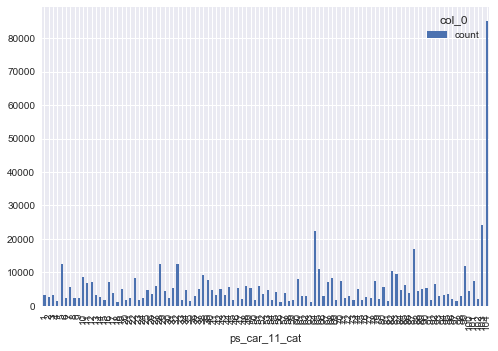


Frequency Table for Categorical Attribute: ps_car_11
col_0       count
ps_car_11        
0           25983
1           60952
2          189353
3          318924

Bar Chart for Categorical Attribute: ps_car_11


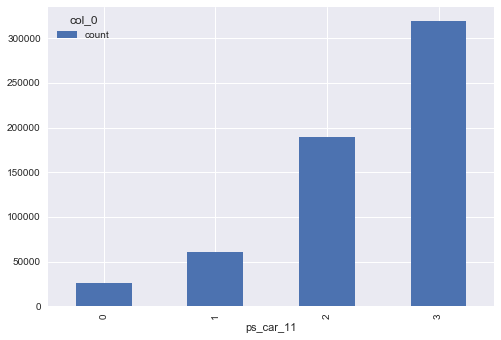


Frequency Table for Categorical Attribute: ps_calc_04
col_0        count
ps_calc_04        
0            23912
1           108012
2           193977
3           175512
4            79606
5            14193

Bar Chart for Categorical Attribute: ps_calc_04


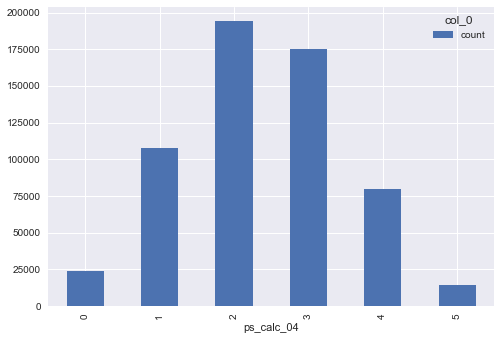


Frequency Table for Categorical Attribute: ps_calc_05
col_0        count
ps_calc_05        
0            61226
1           170860
2           195160
3           119192
4            40682
5             7534
6              558

Bar Chart for Categorical Attribute: ps_calc_05


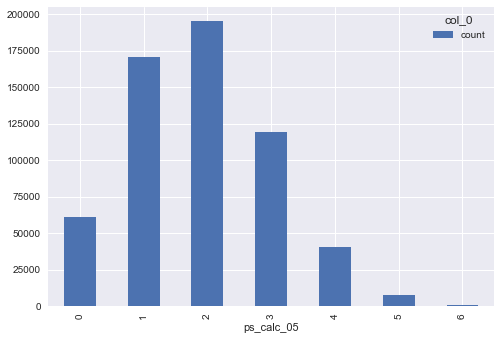


Frequency Table for Categorical Attribute: ps_calc_06
col_0        count
ps_calc_06        
0                1
1                6
2              132
3             1199
4             6705
5            26613
6            73478
7           139771
8           175015
9           129207
10           43085

Bar Chart for Categorical Attribute: ps_calc_06


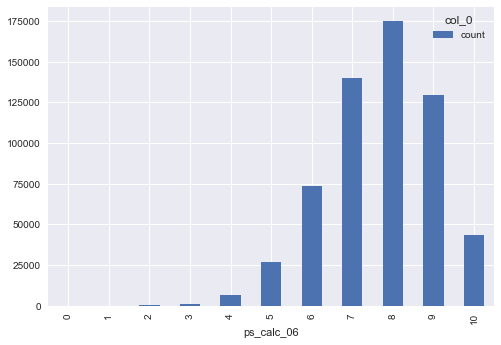


Frequency Table for Categorical Attribute: ps_calc_07
col_0        count
ps_calc_07        
0            15290
1            69309
2           139101
3           162414
4           122039
5            61705
6            20403
7             4381
8              547
9               23

Bar Chart for Categorical Attribute: ps_calc_07


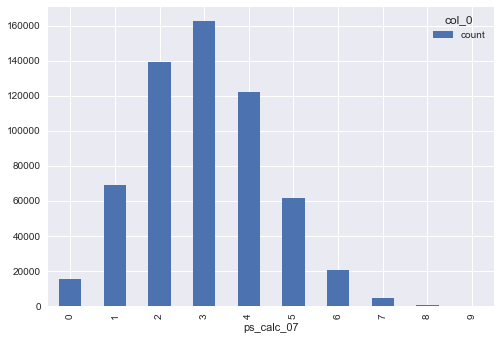


Frequency Table for Categorical Attribute: ps_calc_08
col_0        count
ps_calc_08        
2               10
3               90
4              842
5             4469
6            17183
7            49567
8           102944
9           151746
10          151330
11           91639
12           25392

Bar Chart for Categorical Attribute: ps_calc_08


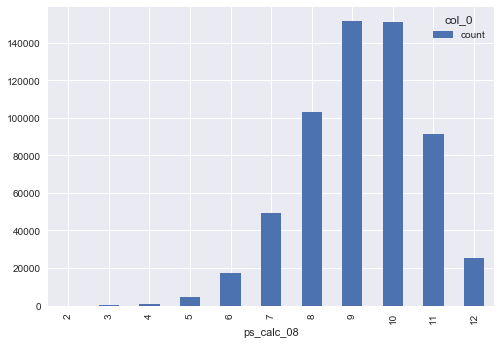


Frequency Table for Categorical Attribute: ps_calc_09
col_0        count
ps_calc_09        
0            34479
1           121391
2           182519
3           152829
4            76973
5            22976
6             3782
7              263

Bar Chart for Categorical Attribute: ps_calc_09


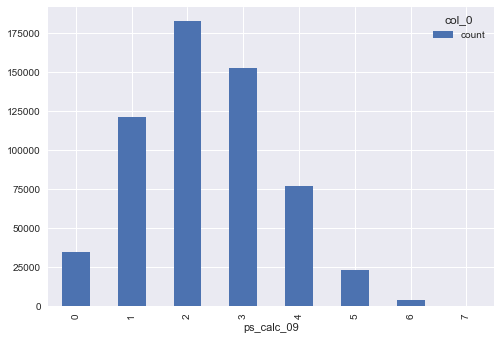


Frequency Table for Categorical Attribute: ps_calc_12
col_0        count
ps_calc_12        
0           141001
1           203280
2           145321
3            70351
4            25778
5             7290
6             1724
7              387
8               66
9               11
10               3

Bar Chart for Categorical Attribute: ps_calc_12


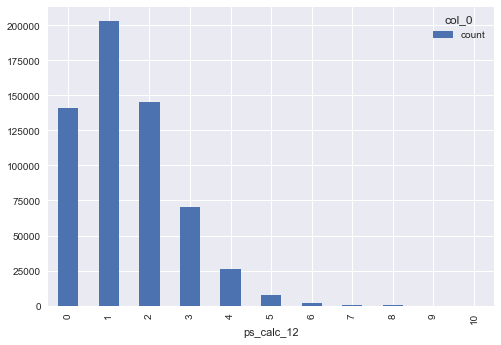


Frequency Table for Categorical Attribute: ps_calc_13
col_0        count
ps_calc_13        
0            33658
1            96661
2           139334
3           132412
4            95753
5            54560
6            26326
7            11003
8             3882
9             1160
10             351
11              88
12              20
13               4

Bar Chart for Categorical Attribute: ps_calc_13


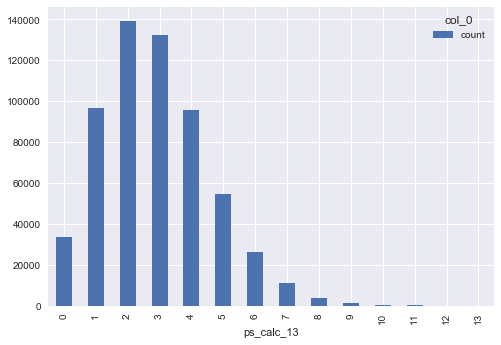


Frequency Table for Categorical Attribute: ps_calc_15_bin
col_0            count
ps_calc_15_bin        
0               522342
1                72870

Bar Chart for Categorical Attribute: ps_calc_15_bin


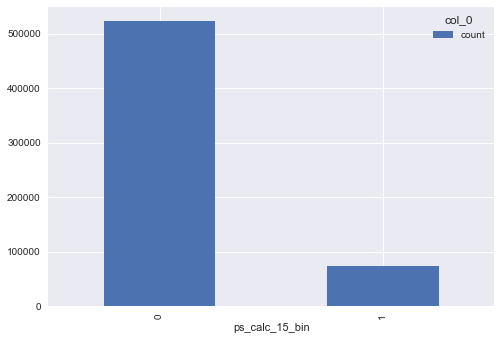


Frequency Table for Categorical Attribute: ps_calc_16_bin
col_0            count
ps_calc_16_bin        
0               221514
1               373698

Bar Chart for Categorical Attribute: ps_calc_16_bin


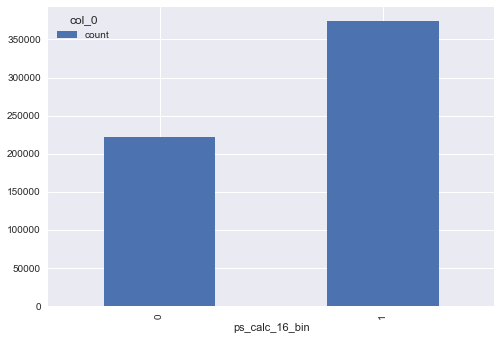


Frequency Table for Categorical Attribute: ps_calc_17_bin
col_0            count
ps_calc_17_bin        
0               265356
1               329856

Bar Chart for Categorical Attribute: ps_calc_17_bin


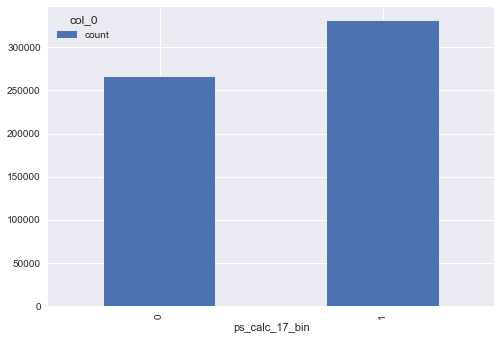


Frequency Table for Categorical Attribute: ps_calc_18_bin
col_0            count
ps_calc_18_bin        
0               424278
1               170934

Bar Chart for Categorical Attribute: ps_calc_18_bin


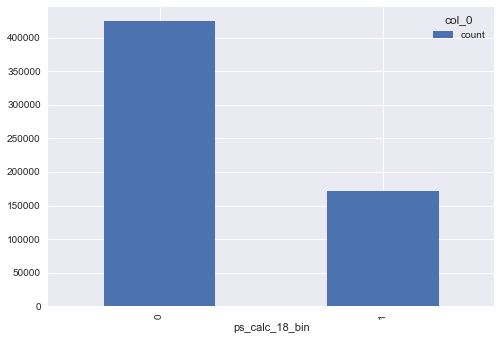


Frequency Table for Categorical Attribute: ps_calc_19_bin
col_0            count
ps_calc_19_bin        
0               387469
1               207743

Bar Chart for Categorical Attribute: ps_calc_19_bin


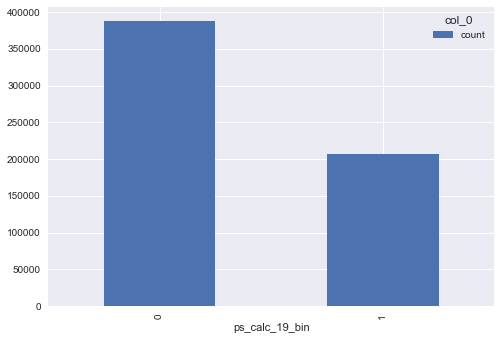


Frequency Table for Categorical Attribute: ps_calc_20_bin
col_0            count
ps_calc_20_bin        
0               503955
1                91257

Bar Chart for Categorical Attribute: ps_calc_20_bin


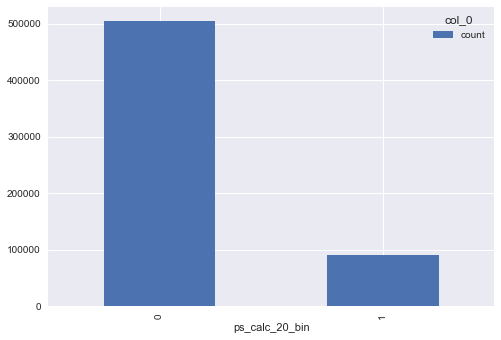

In [25]:
print_bar(data)

### Original dataset split -- train, test, validation

In [19]:
# the function code is changed based on the post here: 
# https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test
def train_validate_test_split(xdf, ydf, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(xdf.index)
    m = len(xdf)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    xtrain = xdf.ix[perm[:train_end]]
    xvalidate = xdf.ix[perm[train_end:validate_end]]
    xtest = xdf.ix[perm[validate_end:]]
    ytrain = ydf.ix[perm[:train_end]]
    yvalidate = ydf.ix[perm[train_end:validate_end]]
    ytest = ydf.ix[perm[validate_end:]]
    return xtrain, xvalidate, xtest, ytrain, yvalidate, ytest

In [20]:
data_target = data.target
data_record = data.drop('target',1)
xtrain, xvalidate, xtest, ytrain, yvalidate, ytest=train_validate_test_split(data_record, data_target, train_percent=.7, validate_percent=.15, seed=222)

/Users/Queena/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Users/Queena/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [21]:
trsize = xtrain.shape[0]
vsize = xvalidate.shape[0]
tesize = xtest.shape[0]
print('The dataset sizes for train, validation, adn test are {}, {}, and {}.'.format(trsize,vsize,tesize))

The dataset sizes for train, validation, adn test are 416648, 89281, and 89283.


### Data Transform Experiment -- PCA on continous
New dataset:

xtrain_pca_4,
xtest_pca_4,
xvalidate_pca_4

xtrain_pca_6,
xtest_pca_6,
xvalidate_pca_6

Transforms of test and validate datset are basd on the model fitted by training dataset. 

In [22]:
# Try PCA to decrease the dimensions and also noise. 
# Perform the PCA to create same component amount as the feature amount
from sklearn import decomposition
import matplotlib.axes as axes

num_train = xtrain[num_names]
pca_all = decomposition.PCA(n_components=len(num_names))
images_n_pca_all = pca_all.fit(num_train).transform(num_train)
pca_all_variance = pca_all.explained_variance_ratio_

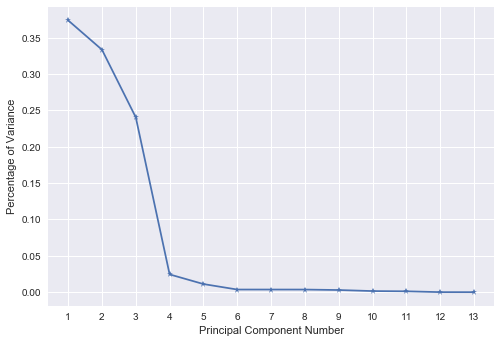

Pca_all_variance Sum Table


,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.373762,0.707148,0.947509,0.971988,0.983183,0.98684,0.990485,0.994114,0.997097,0.998647,0.999879,0.999959,1.0


In [23]:
# Present all the information to decide the optimal n_components
# plot 1
ax = plt.figure().add_subplot(111)
components = [i for i in range(1,(len(num_names)+1))]
ax.set_xticks(components)
ax.plot(components,pca_all_variance,marker='*')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

# pca_all_variance sum table
print('Pca_all_variance Sum Table')
sums=0
sumlist = []
for i in range(len(num_names)):
    sums += pca_all_variance[i]
    sumlist.append(sums)
pca_all_variance_sum = pd.DataFrame (sumlist,index=range(1,(len(num_names)+1))).T
pca_all_variance_sum

I want to create a PCA table and check whether PCA as variables can have clear distribution over the 2 classes. 
The only thing I am afraid is that the PCA application can denoise. But in this case, the minority class is considered as "noise", which is the reason that I can't use this so comfortable. 
Another bold but maybe less validate approach is to consider all the variables as numeric, at least take the ordinal as numeric, then apply the PCA on the dataset and check the performance of the prediction.

In [24]:
# PCA with all components and check the distribution over target classesx
num_xtrain_pca = pd.DataFrame(pca_all.fit(num_train).transform(num_train))
num_xtrain_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-4.469503,-2.483134,-0.422289,3.042396,0.532370,-0.340025,-0.169214,-0.042933,0.329099,0.016371,-0.216906,-0.076632,-0.040677
1,-3.403758,1.507987,2.571594,0.120048,-0.227384,0.322153,0.494531,-0.347598,-0.007666,-0.183488,-0.025741,-0.013431,-0.010039
2,2.564764,-0.572921,1.549037,-0.250579,-0.404787,-0.394809,0.018465,-0.093709,0.312815,0.113735,-0.097327,0.008585,0.004035
3,4.543158,-1.601823,-0.458413,-0.047577,1.507257,0.273478,0.001502,-0.113339,0.199698,-0.310818,0.097988,0.031582,0.006687
4,1.574390,0.440312,0.552561,-0.673625,-0.225880,0.195083,-0.093753,0.443380,-0.340813,0.154992,0.109851,-0.011844,-0.020403


The Histogram for Numeric Variale 0


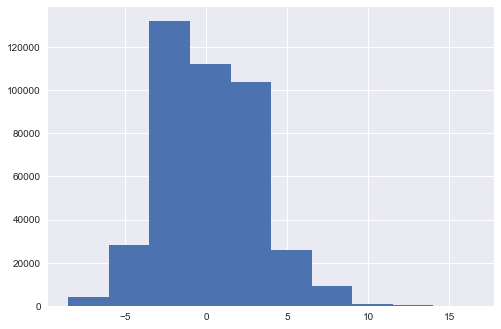


The Histogram for Numeric Variale 1


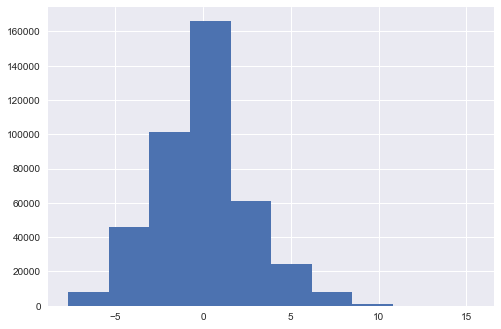


The Histogram for Numeric Variale 2


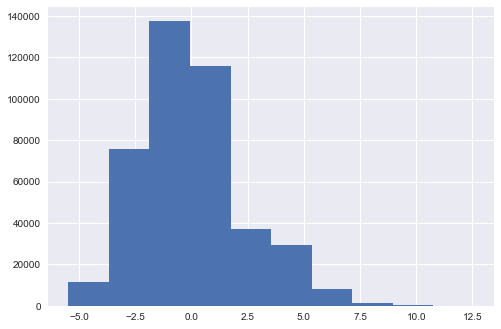


The Histogram for Numeric Variale 3


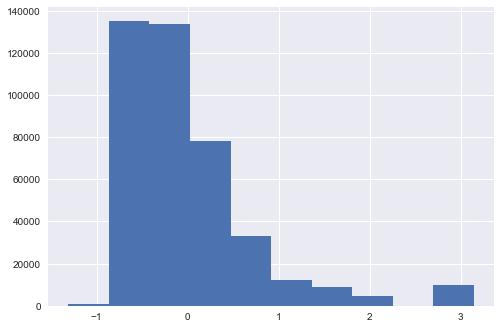


The Histogram for Numeric Variale 4


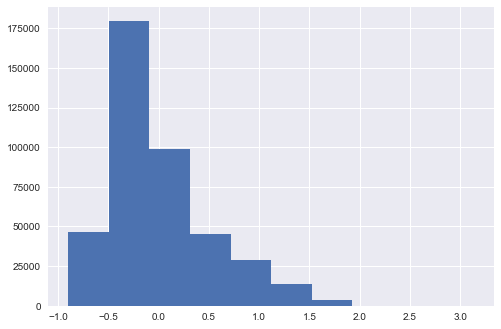


The Histogram for Numeric Variale 5


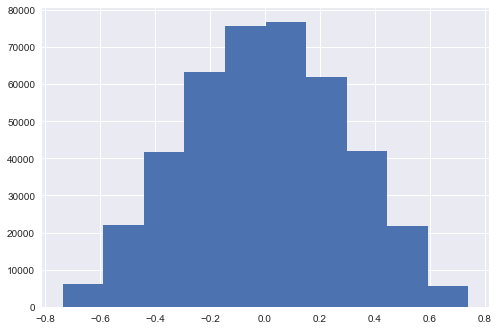


The Histogram for Numeric Variale 6


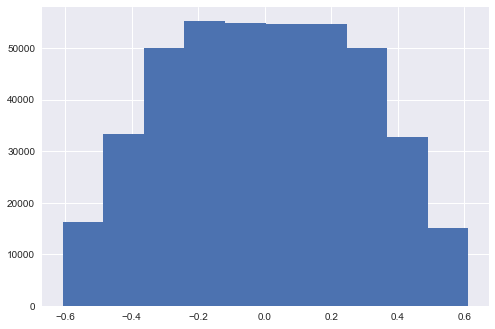


The Histogram for Numeric Variale 7


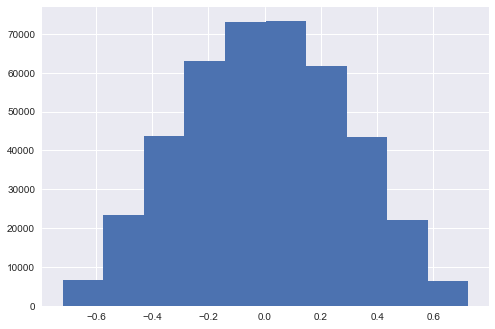


The Histogram for Numeric Variale 8


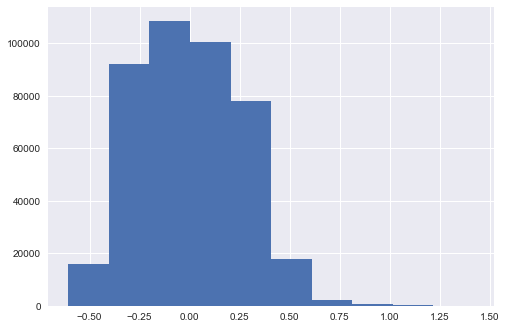


The Histogram for Numeric Variale 9


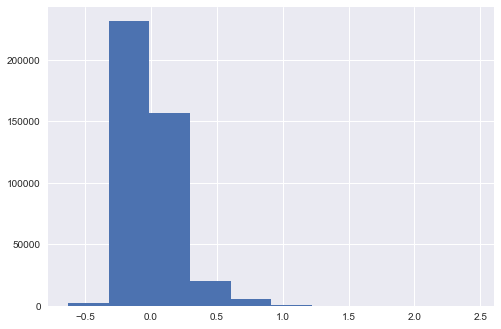


The Histogram for Numeric Variale 10


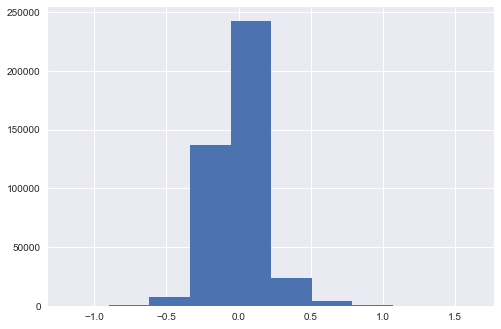


The Histogram for Numeric Variale 11


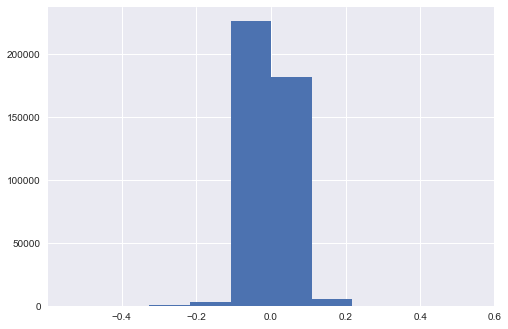


The Histogram for Numeric Variale 12


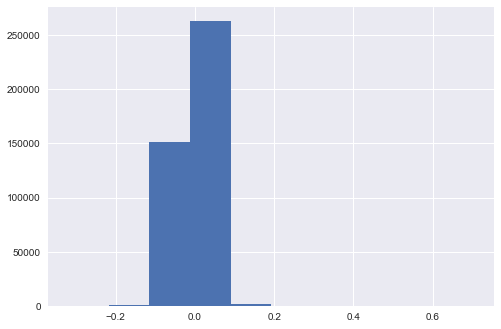

In [32]:
print_histograms(num_xtrain_pca)

The Boxplot for Numeric Variale 0


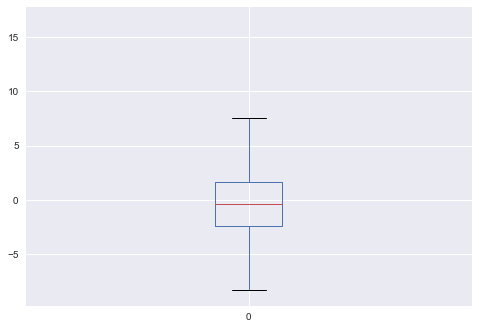


The Boxplot for Numeric Variale 1


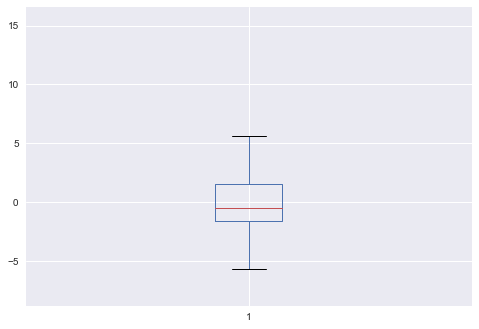


The Boxplot for Numeric Variale 2


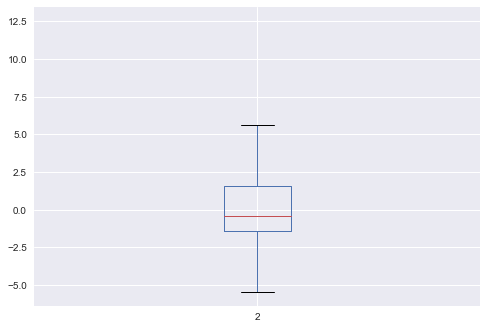


The Boxplot for Numeric Variale 3


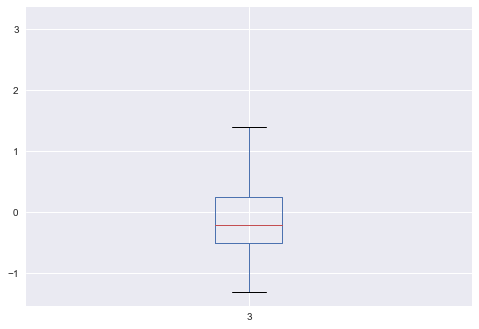


The Boxplot for Numeric Variale 4


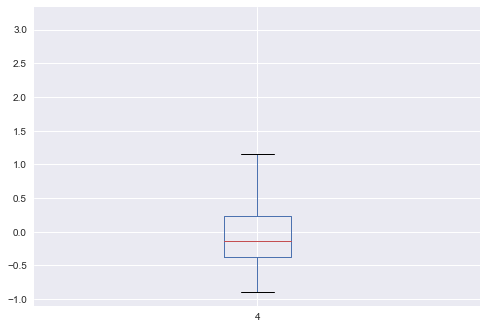


The Boxplot for Numeric Variale 5


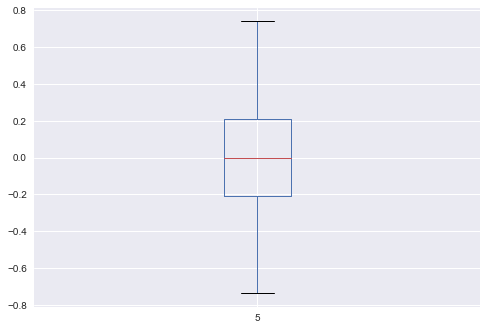


The Boxplot for Numeric Variale 6


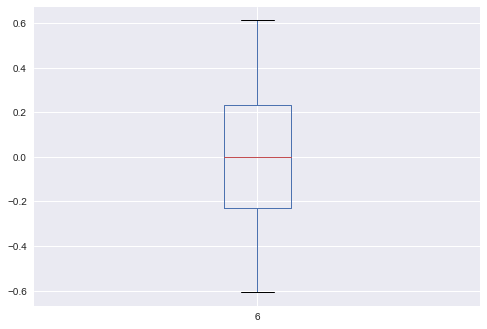


The Boxplot for Numeric Variale 7


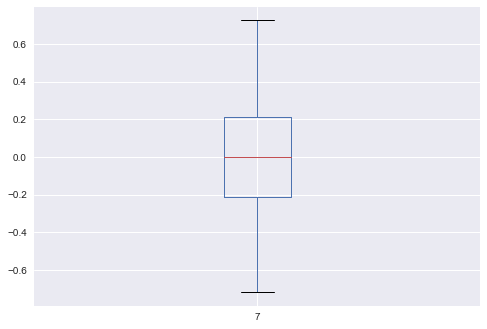


The Boxplot for Numeric Variale 8


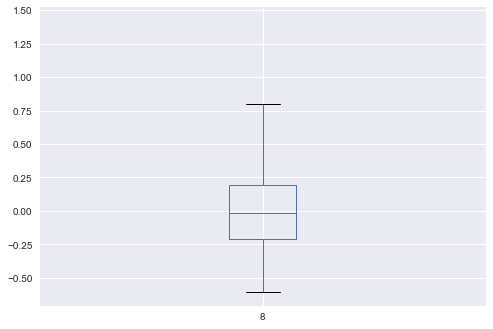


The Boxplot for Numeric Variale 9


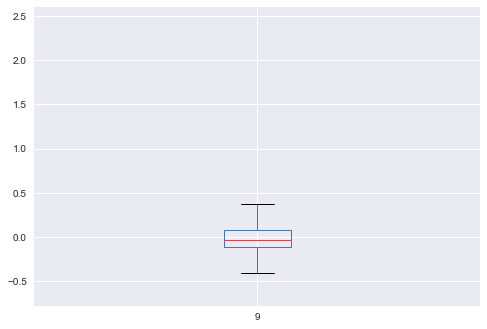


The Boxplot for Numeric Variale 10


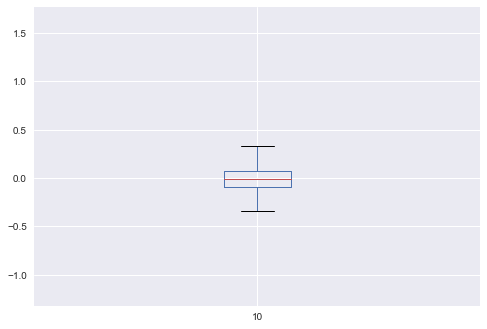


The Boxplot for Numeric Variale 11


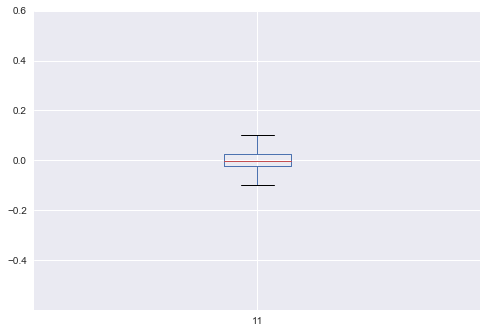


The Boxplot for Numeric Variale 12


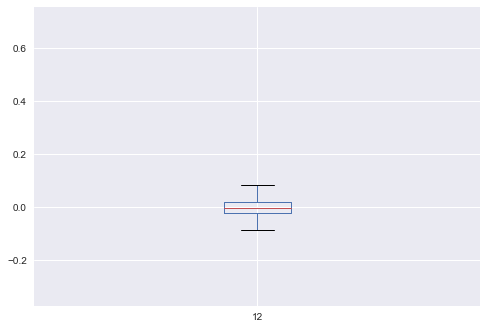

In [33]:
print_boxplot(num_xtrain_pca)

In [25]:
num_train_pca = num_xtrain_pca
num_train_pca['target']=np.array(ytrain)
num_train_pca['target']=num_train_pca['target'].astype('category')

The Histogram for Numeric Variale 0 over Target Variable Classes


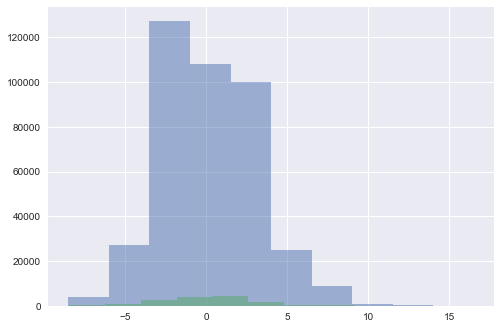


The Histogram for Numeric Variale 1 over Target Variable Classes


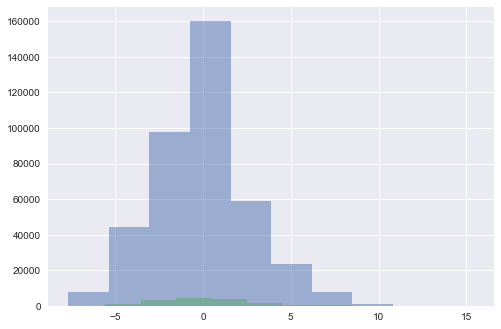


The Histogram for Numeric Variale 2 over Target Variable Classes


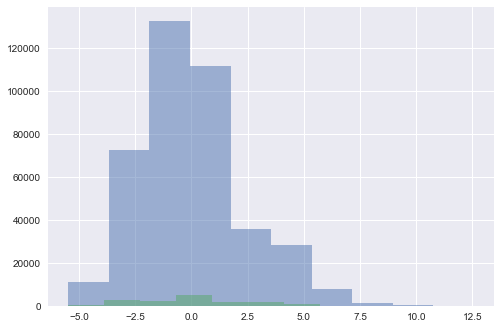


The Histogram for Numeric Variale 3 over Target Variable Classes


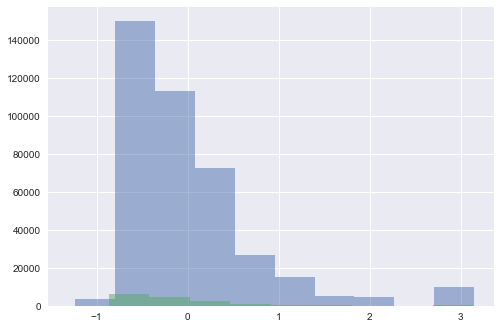


The Histogram for Numeric Variale 4 over Target Variable Classes


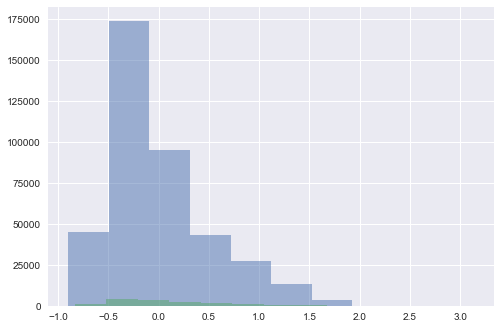


The Histogram for Numeric Variale 5 over Target Variable Classes


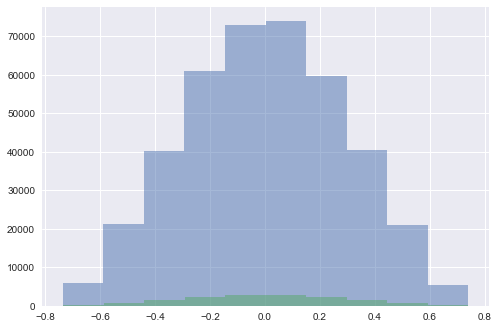


The Histogram for Numeric Variale 6 over Target Variable Classes


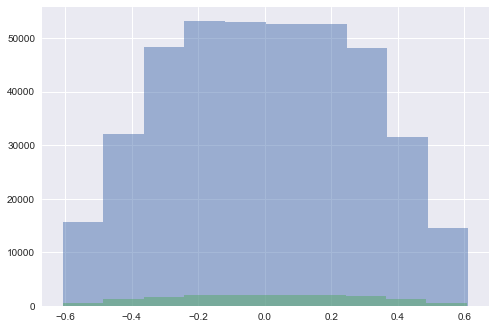


The Histogram for Numeric Variale 7 over Target Variable Classes


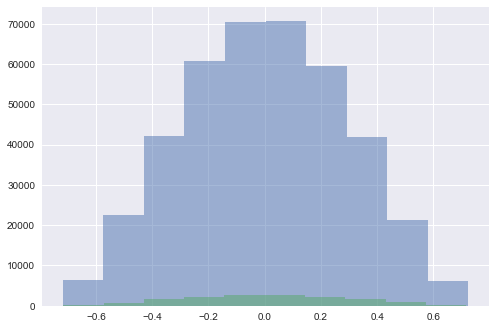


The Histogram for Numeric Variale 8 over Target Variable Classes


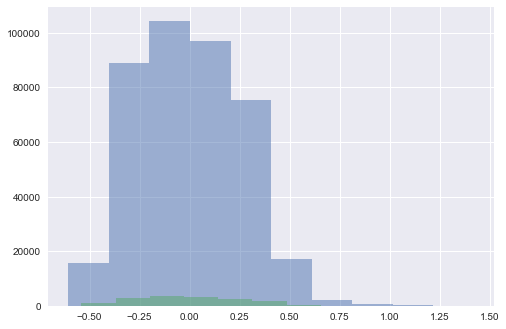


The Histogram for Numeric Variale 9 over Target Variable Classes


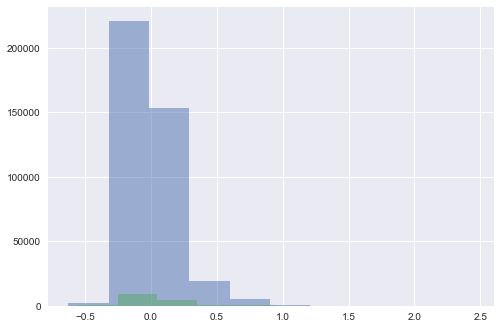


The Histogram for Numeric Variale 10 over Target Variable Classes


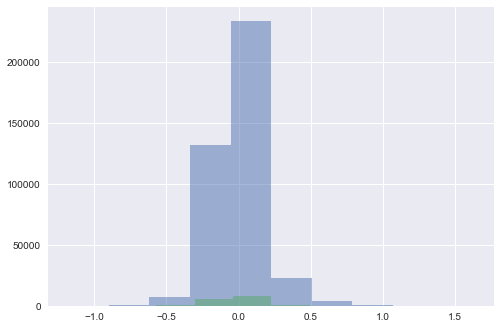


The Histogram for Numeric Variale 11 over Target Variable Classes


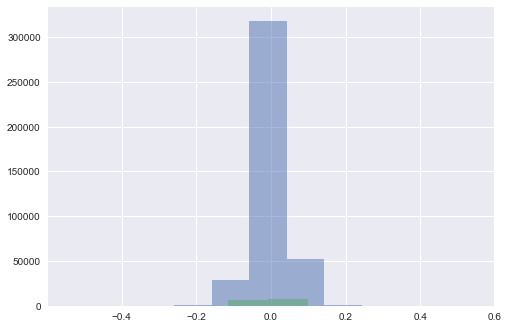


The Histogram for Numeric Variale 12 over Target Variable Classes


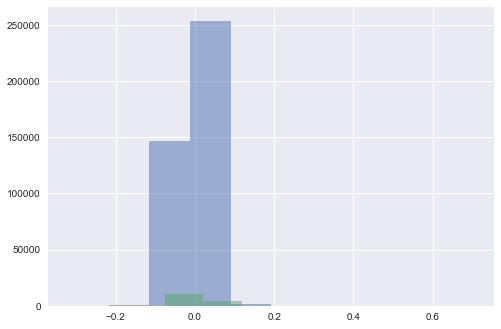

In [35]:
print_histograms_overclasses(num_train_pca,"target")

The Density for Numeric Variale 0 over Target Variable Classes


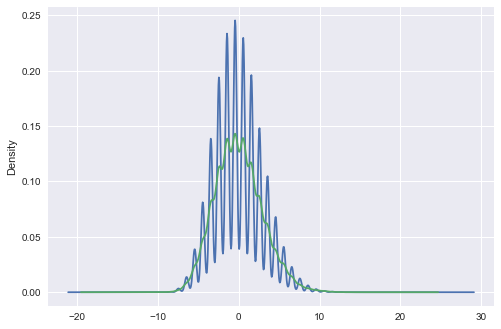


The Density for Numeric Variale 1 over Target Variable Classes


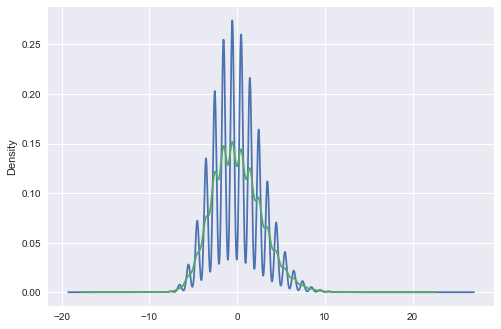


The Density for Numeric Variale 2 over Target Variable Classes


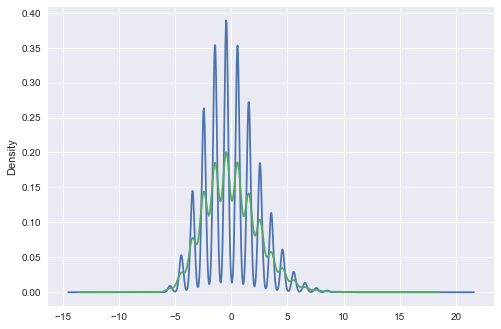


The Density for Numeric Variale 3 over Target Variable Classes


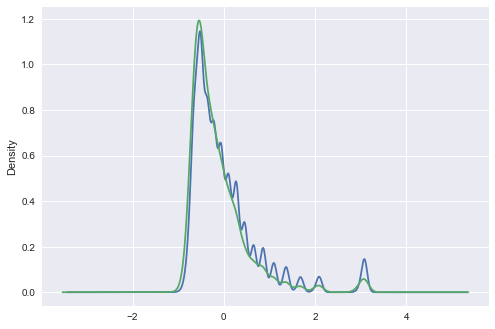


The Density for Numeric Variale 4 over Target Variable Classes


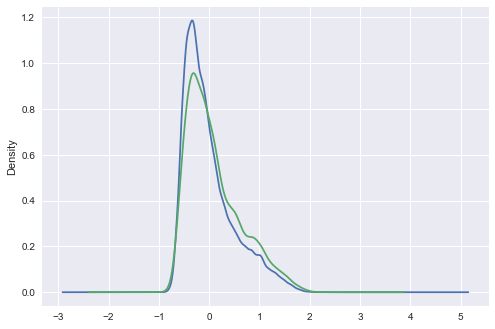


The Density for Numeric Variale 5 over Target Variable Classes


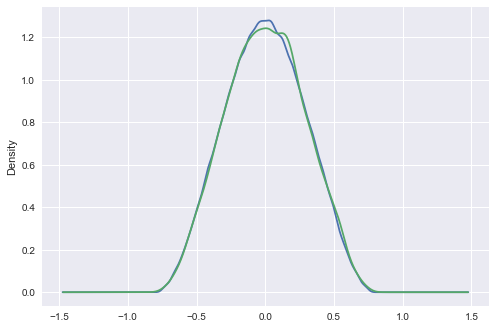


The Density for Numeric Variale 6 over Target Variable Classes


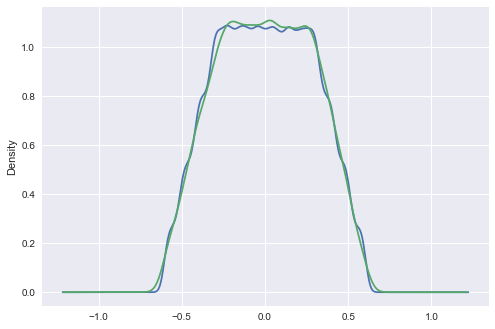


The Density for Numeric Variale 7 over Target Variable Classes


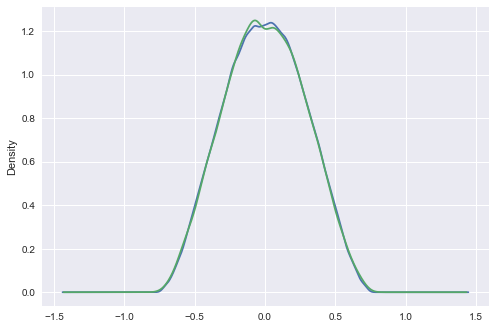


The Density for Numeric Variale 8 over Target Variable Classes


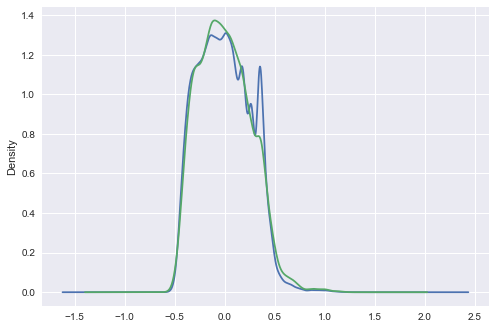


The Density for Numeric Variale 9 over Target Variable Classes


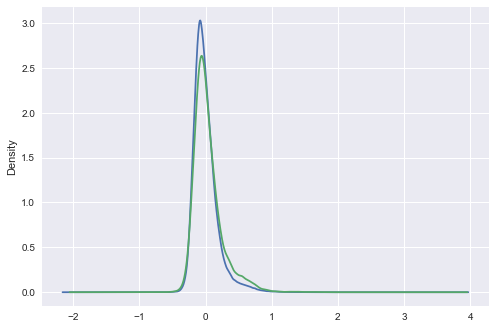


The Density for Numeric Variale 10 over Target Variable Classes


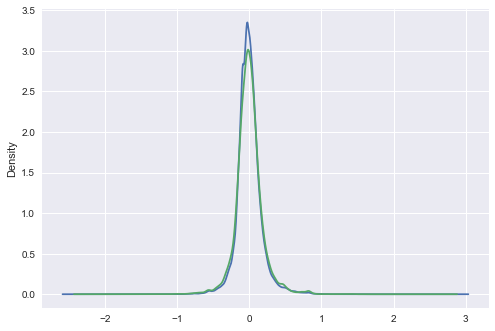


The Density for Numeric Variale 11 over Target Variable Classes


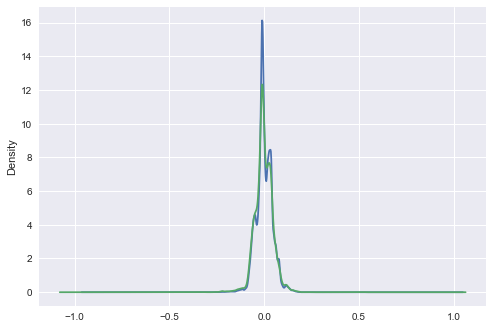


The Density for Numeric Variale 12 over Target Variable Classes


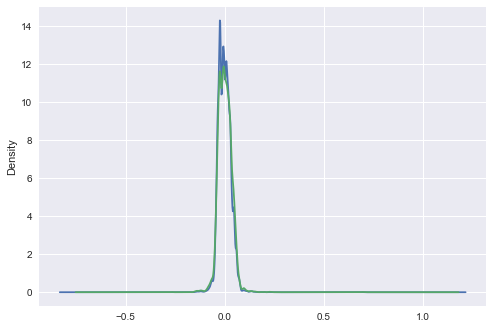

In [36]:
print_density_overclasses(num_train_pca,"target")

In [161]:
def add_pca_back(pcanumber,pcafitbase,pcatransbase):
    num_names = [name for name in pcatransbase.columns if (pcatransbase[name].dtype == 'int64') or (pcatransbase[name].dtype == 'float64')]
    pcadata = pcatransbase.drop(num_names,axis=1,inplace=False)
    pcadata.reset_index(drop=True, inplace=True)
    pcafit = pcafitbase[num_names]
    pcatrans = pcatransbase[num_names]
    
    pca = decomposition.PCA(n_components=int(pcanumber))
    pca_trans = pd.DataFrame(pca.fit(pcafit).transform(pcatrans))
    
    for i in range(pcanumber):
        name = 'pc'+str(i+1)
        pcadata[name] = pca_trans[i].astype('float')
    return pcadata

In [162]:
xtrain_pca_4 = add_pca_back(4,xtrain,xtrain)
xtest_pca_4 = add_pca_back(4,xtrain,xtest)
xvalidate_pca_4 = add_pca_back(4,xtrain,xvalidate)

In [163]:
xtrain_pca_6 = add_pca_back(6,xtrain,xtrain)
xtest_pca_6 = add_pca_back(6,xtrain,xtest)
xvalidate_pca_6 = add_pca_back(6,xtrain,xvalidate)
xtrain_pca_6.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,pc1,pc2,pc3,pc4,pc5,pc6
0,3,1,1,1,0,0,0,0,1,0,...,1,0,1,0,-4.469503,-2.483134,-0.422289,3.042396,0.532370,-0.340025
1,3,2,2,1,0,0,0,1,0,0,...,1,1,0,0,-3.403758,1.507987,2.571594,0.120048,-0.227384,0.322153
2,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,2.564764,-0.572921,1.549037,-0.250579,-0.404787,-0.394809
3,2,2,1,1,4,0,0,1,0,0,...,1,0,0,1,4.543158,-1.601823,-0.458413,-0.047577,1.507257,0.273478
4,0,1,9,0,0,1,0,0,0,0,...,1,0,1,0,1.574390,0.440312,0.552561,-0.673625,-0.225880,0.195083


In [164]:
# To keep index consistant for further comparison, reindex the dataset
ytrain.reset_index(drop=True, inplace=True)
ytrain = pd.DataFrame(ytrain)
ytest.reset_index(drop=True, inplace=True)
ytest = pd.DataFrame(ytest)
yvalidate.reset_index(drop=True, inplace=True)
yvalidate = pd.DataFrame(yvalidate)
xtrain.reset_index(drop=True, inplace=True)
xtest.reset_index(drop=True, inplace=True)
xvalidate.reset_index(drop=True, inplace=True)

In [165]:
ytrain.describe()

,target
count,416648
unique,2
top,0
freq,401543


In [166]:
ytest.describe()

,target
count,89283
unique,2
top,0
freq,86024


In [167]:
yvalidate.describe()

,target
count,89281
unique,2
top,0
freq,85951


### Data Analysis with Machine Learning Tech
Start from sample and resample
Then it comes to techniques -- KNN, NB, 
Create pipline for these analysis -- you need to grid search the best for the model

In [33]:
# The quality of the model should be evaluated by the Normalized Gini Coefficient
# This is the requirement and judgement of the model predictive power in this competition.
# Compute gini
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703

def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
 
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return [('gini', gini_score)]

In [34]:
# This is a more time efficient version, which is why used here.
from numba import jit

@jit
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

In [73]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids

### Resample
random undersample, undersampling by generating cluster centroids based on clustering methods, random oversample

##### Random Undersample

In [168]:
count_class_0, count_class_1 = ytrain.target.value_counts()

# Divide by class
xtrain_class_0 = xtrain[ytrain['target'] == 0]
xtrain_class_1 = xtrain[ytrain['target'] == 1]

In [169]:
# Random under-sampling
xtrain_class_0_under = xtrain_class_0.sample(count_class_1,random_state=1)
xtrain_under = pd.concat([xtrain_class_0_under, xtrain_class_1], axis=0)

In [170]:
# Find related y
xtrain_index_list = list(xtrain_under.index)
ytrain_under = ytrain.ix[xtrain_index_list]measure_performance2(pcaclf1,xtrain_pca4_under,ytrain_pca4_under,xvalidate_pca_4,yvalidate)

/Users/Queena/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()


##### Random Undersample over PCA data

In [171]:
# Divide by class
xtrain_class_0_pca4 = xtrain_pca_4[ytrain['target'] == 0]
xtrain_class_1_pca4 = xtrain_pca_4[ytrain['target'] == 1]

In [172]:
# Random under-sampling
xtrain_class_0_pca4_under = xtrain_class_0_pca4.sample(count_class_1,random_state=1)
xtrain_pca4_under = pd.concat([xtrain_class_0_pca4_under, xtrain_class_1_pca4], axis=0)

In [173]:
# Find related y
xtrain_index_list_pca4 = list(xtrain_pca4_under.index)
ytrain_pca4_under = ytrain.ix[xtrain_index_list_pca4]

##### Udersampling by generating cluster centroids over PCA data

In [82]:
from sklearn import neighbors, tree, naive_bayes
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

In [93]:
NGINI = make_scorer(eval_gini, greater_is_better=False)
NGINI2 = make_scorer(eval_gini, greater_is_better=True)

##### Default Exploration

In [84]:
def cross_scores(pipeline, xtrain, ytrain):
    scores1 = cross_val_score(pipeline, xtrain, ytrain, cv=3)
    scores2 = cross_val_score(pipeline, xtrain, ytrain, cv=3, scoring='roc_auc')
    scores3 = cross_val_score(pipeline, xtrain, ytrain, cv=3, scoring=NGINI)
    print("Cross_score (accuracy): %.5f" % (scores1.mean()))
    print("Cross_score (ROC AUC): %.5f" % (scores2.mean()))
    print("Cross_score (Normalized GINI): %.5f" % (scores3.mean()))

def cross_scores_overdataset(pipeline,xtrain,ytrain,xtrain_pca,ytrain_pca):
    print('ORIGINAL DATASET')
    cross_scores(pipeline, xtrain, ytrain)
    print('\n\nPCA DATASET')
    cross_scores(pipeline, xtrain_pca,ytrain_pca)

In [88]:
# NB
pipeline = Pipeline([
    ('NB', MultinomialNB())
    #('KNN',neighbors.KNeighborsClassifier()),
    #('tree', tree.DecisionTreeClassifier()),
    #('RF', RandomForestClassifier(random_state=1)),
    #('AB', AdaBoostClassifier(random_state=1))
    #('SVM', SVC(random_state=1))
])

cross_scores_overdataset(pipeline,xtrain_under,ytrain_under,xtrain_pca4_under,ytrain_pca4_under)

ORIGINAL DATASET


/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Cross_score (accuracy): 0.56991
Cross_score (ROC AUC): 0.59749
Cross_score (Normalized GINI): 0.11185


PCA DATASET


ValueError: Input X must be non-negative

In [89]:
# KNN
pipeline = Pipeline([
    #('NB', MultinomialNB())
    ('KNN',neighbors.KNeighborsClassifier())
    #('tree', tree.DecisionTreeClassifier())
    #('RF', RandomForestClassifier(random_state=1))
    #('AB', AdaBoostClassifier(random_state=1))
    #('SVM', SVC(random_state=1))
])

cross_scores_overdataset(pipeline,xtrain_under,ytrain_under,xtrain_pca4_under,ytrain_pca4_under)

ORIGINAL DATASET


/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Cross_score (accuracy): 0.52370
Cross_score (ROC AUC): 0.53093
Cross_score (Normalized GINI): 0.09563


PCA DATASET


/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Cross_score (accuracy): 0.52347
Cross_score (ROC AUC): 0.53135
Cross_score (Normalized GINI): 0.09903


In [90]:
# Decision Tree
pipeline = Pipeline([
    #('NB', MultinomialNB())
    #('KNN',neighbors.KNeighborsClassifier())
    ('tree', tree.DecisionTreeClassifier())
    #('RF', RandomForestClassifier(random_state=1))
    #('AB', AdaBoostClassifier(random_state=1))
    #('SVM', SVC(random_state=1))
])

cross_scores_overdataset(pipeline,xtrain_under,ytrain_under,xtrain_pca4_under,ytrain_pca4_under)

ORIGINAL DATASET
Cross_score (accuracy): 0.52208
Cross_score (ROC AUC): 0.51976
Cross_score (Normalized GINI): 0.12092


PCA DATASET
Cross_score (accuracy): 0.51999
Cross_score (ROC AUC): 0.52267
Cross_score (Normalized GINI): 0.11610


In [91]:
# Random Forest
pipeline = Pipeline([
    #('NB', MultinomialNB())
    #('KNN',neighbors.KNeighborsClassifier())
    #('tree', tree.DecisionTreeClassifier())
    ('RF', RandomForestClassifier(random_state=1))
    #('AB', AdaBoostClassifier(random_state=1))
    #('SVM', SVC(random_state=1))
])

cross_scores_overdataset(pipeline,xtrain_under,ytrain_under,xtrain_pca4_under,ytrain_pca4_under)

ORIGINAL DATASET


/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Cross_score (accuracy): 0.55045
Cross_score (ROC AUC): 0.56813
Cross_score (Normalized GINI): 0.10481


PCA DATASET


/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Cross_score (accuracy): 0.54184
Cross_score (ROC AUC): 0.56094
Cross_score (Normalized GINI): 0.12245


In [92]:
# Ada Boost
pipeline = Pipeline([
    #('NB', MultinomialNB())
    #('KNN',neighbors.KNeighborsClassifier())
    #('tree', tree.DecisionTreeClassifier())
    #('RF', RandomForestClassifier(random_state=1))
    ('AB', AdaBoostClassifier(random_state=1))
    #('SVM', SVC(random_state=1))
])

cross_scores_overdataset(pipeline,xtrain_under,ytrain_under,xtrain_pca4_under,ytrain_pca4_under)

ORIGINAL DATASET


/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Cross_score (accuracy): 0.58822
Cross_score (ROC AUC): 0.62512
Cross_score (Normalized GINI): -0.05567


PCA DATASET


/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Cross_score (accuracy): 0.58570
Cross_score (ROC AUC): 0.62003
Cross_score (Normalized GINI): -0.03697


In [50]:
# Support Vector Machine
pipeline = Pipeline([
    #('NB', MultinomialNB())
    #('KNN',neighbors.KNeighborsClassifier())
    #('tree', tree.DecisionTreeClassifier())
    #('RF', RandomForestClassifier(random_state=1))
    #('AB', AdaBoostClassifier(random_state=1))
    ('SVM', SVC(random_state=1))
])

cross_scores_overdataset(pipeline,xtrain_under,ytrain_under,xtrain_pca4_under,ytrain_pca4_under)

ORIGINAL DATASET


/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Cross_score (accuracy): 0.55280
Cross_score (ROC AUC): 0.57485
Cross_score (Normalized GINI): 0.02873


PCA DATASET


/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Cross_score (accuracy): 0.54767
Cross_score (ROC AUC): 0.56846
Cross_score (Normalized GINI): 0.04463


##### Grid Search for The Model with Best Parameters

In [133]:
# Performance of best GridSearch Model
def measure_performance(xtest, ytest, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(xtest) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(ytest, y_pred)))
        print ("Normalized GINI:{0:.3f}".format(eval_gini(ytest, y_pred)),"\n")
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(ytest, y_pred),"\n")
    if show_confussion_matrix:
        cm = metrics.confusion_matrix(ytest, y_pred)
        print ("Confussion matrix")
        print (cm,"\n")
        print ("Confusion matrix visulization")
        plt.matshow(cm)
        plt.title('Confusion matrix')
        plt.colorbar()
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

def grid_search_perform(pipeline, parameters, xtrain, ytrain, xtest, ytest):
    clf = GridSearchCV(pipeline, parameters, cv = 3, verbose=1, scoring='roc_auc')
    clf.fit(xtrain,ytrain)
    print("FOR ROC AUC")
    print("Best model parameter(ROC_AUC):\n{}".format(clf.best_params_))
    print('Best model (ROC_AUC) performance:')
    clf.refit
    measure_performance(xtest, ytest, clf)
    
    clf = GridSearchCV(pipeline, parameters, cv = 3, scoring=NGINI2)
    clf.fit(xtrain,ytrain)
    print("FOR NORMALIZED GINI")
    print("Best model parameter(NGINI):\n{}".format(clf.best_params_))
    print('Best model (NGINI) performance:')
    clf.refit
    measure_performance(xtest, ytest, clf)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    3.6s finished


FOR ROC AUC
Best model parameter(ROC_AUC):
{'NB__alpha': 1.0}
Best model (ROC_AUC) performance:
Accuracy:0.720
Normalized GINI:0.116 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.73      0.83     86024
          1       0.05      0.38      0.09      3259

avg / total       0.94      0.72      0.81     89283
 

Confussion matrix
[[63003 23021]
 [ 2008  1251]] 

Confusion matrix visulization


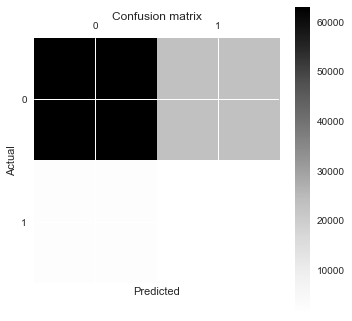

FOR NORMALIZED GINI
Best model parameter(NGINI):
{'NB__alpha': 1.0}
Best model (NGINI) performance:
Accuracy:0.720
Normalized GINI:0.116 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.73      0.83     86024
          1       0.05      0.38      0.09      3259

avg / total       0.94      0.72      0.81     89283
 

Confussion matrix
[[63003 23021]
 [ 2008  1251]] 

Confusion matrix visulization


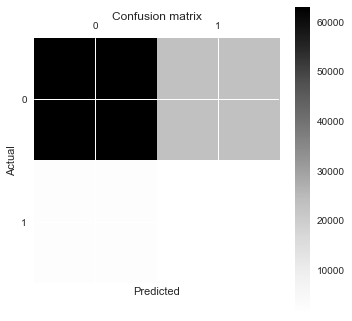

In [174]:
# Naive Bay (normal)
pipeline = Pipeline([
    ('NB', MultinomialNB())
    #('KNN',neighbors.KNeighborsClassifier())
    #('tree', tree.DecisionTreeClassifier(random_state=1))
    #('RF', RandomForestClassifier(random_state=1))
    #('AB', AdaBoostClassifier(random_state=1))
    #('SVM', SVC(random_state=1))
])

parameters = {'NB__alpha': np.logspace(-7,0,8)}

grid_search_perform(pipeline, parameters, xtrain_under, ytrain_under.target, xtest, ytest.target)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits


[Parallel(n_jobs=1)]: Done 1176 out of 1176 | elapsed: 135.1min finished


FOR ROC AUC
Best model parameter(ROC_AUC):
{'KNN__algorithm': 'auto', 'KNN__metric': 'minkowski', 'KNN__n_neighbors': 39}
Best model (ROC_AUC) performance:
Accuracy:0.622
Normalized GINI:0.074 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.63      0.76     86024
          1       0.04      0.45      0.08      3259

avg / total       0.93      0.62      0.74     89283
 

Confussion matrix
[[54064 31960]
 [ 1799  1460]] 

Confusion matrix visulization


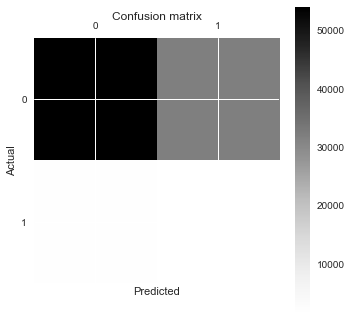

FOR NORMALIZED GINI
Best model parameter(NGINI):
{'KNN__algorithm': 'auto', 'KNN__metric': 'minkowski', 'KNN__n_neighbors': 39}
Best model (NGINI) performance:
Accuracy:0.622
Normalized GINI:0.074 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.63      0.76     86024
          1       0.04      0.45      0.08      3259

avg / total       0.93      0.62      0.74     89283
 

Confussion matrix
[[54064 31960]
 [ 1799  1460]] 

Confusion matrix visulization


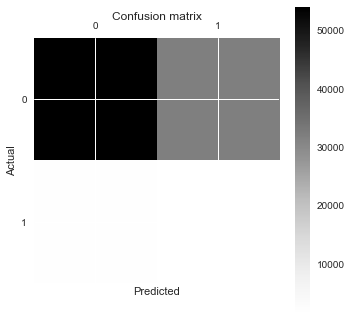

In [181]:
# KNN (normal)
pipeline = Pipeline([
    #('NB', MultinomialNB())
    ('KNN',neighbors.KNeighborsClassifier())
    #('tree', tree.DecisionTreeClassifier(random_state=1))
    #('RF', RandomForestClassifier(random_state=1))
    #('AB', AdaBoostClassifier(random_state=1))
    #('SVM', SVC(random_state=1))
])

parameters = {'KNN__n_neighbors': list(range(1,50)),
              'KNN__algorithm': ['auto',"ball_tree","kd_tree","brute"],
              "KNN__metric":["minkowski","euclidean"]
}

grid_search_perform(pipeline, parameters, xtrain_under, ytrain_under.target, xtest, ytest.target)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   40.3s finished


FOR ROC AUC
Best model parameter(ROC_AUC):
{'tree__criterion': 'entropy', 'tree__min_samples_leaf': 60}
Best model (ROC_AUC) performance:
Accuracy:0.566
Normalized GINI:0.103 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.57      0.72     86024
          1       0.05      0.54      0.08      3259

avg / total       0.94      0.57      0.69     89283
 

Confussion matrix
[[48757 37267]
 [ 1500  1759]] 

Confusion matrix visulization


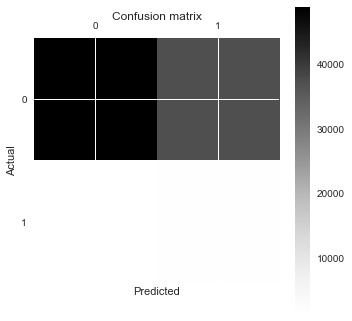

FOR NORMALIZED GINI
Best model parameter(NGINI):
{'tree__criterion': 'gini', 'tree__min_samples_leaf': 60}
Best model (NGINI) performance:
Accuracy:0.549
Normalized GINI:0.118 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.55      0.70     86024
          1       0.05      0.57      0.08      3259

avg / total       0.94      0.55      0.68     89283
 

Confussion matrix
[[47174 38850]
 [ 1410  1849]] 

Confusion matrix visulization


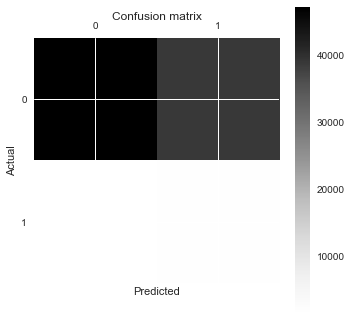

In [175]:
# Decision Tree (normal)
pipeline = Pipeline([
    #('NB', MultinomialNB())
    #('KNN',neighbors.KNeighborsClassifier())
    ('tree', tree.DecisionTreeClassifier(random_state=1))
    #('RF', RandomForestClassifier(random_state=1))
    #('AB', AdaBoostClassifier(random_state=1))
    #('SVM', SVC(random_state=1))
])

parameters = {'tree__criterion': ['entropy', 'gini'],
              'tree__min_samples_leaf':[2,4,6,8,10,12,14,16,18,20,30,40,50,60]
}

grid_search_perform(pipeline, parameters, xtrain_under, ytrain_under.target, xtest, ytest.target)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   38.5s finished


FOR ROC AUC
Best model parameter(ROC_AUC):
{'tree__criterion': 'gini', 'tree__min_samples_leaf': 60}
Best model (ROC_AUC) performance:
Accuracy:0.569
Normalized GINI:0.093 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.57      0.72     86024
          1       0.04      0.52      0.08      3259

avg / total       0.94      0.57      0.69     89283
 

Confussion matrix
[[49061 36963]
 [ 1554  1705]] 

Confusion matrix visulization


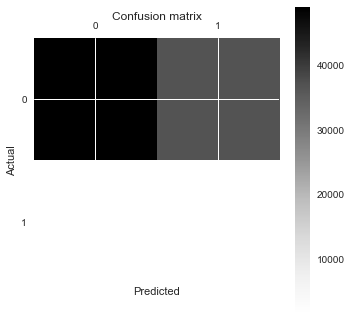

FOR NORMALIZED GINI
Best model parameter(NGINI):
{'tree__criterion': 'gini', 'tree__min_samples_leaf': 60}
Best model (NGINI) performance:
Accuracy:0.569
Normalized GINI:0.093 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.57      0.72     86024
          1       0.04      0.52      0.08      3259

avg / total       0.94      0.57      0.69     89283
 

Confussion matrix
[[49061 36963]
 [ 1554  1705]] 

Confusion matrix visulization


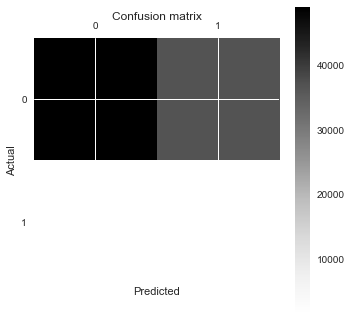

In [176]:
# Decision Tree (pca)
grid_search_perform(pipeline, parameters, xtrain_pca4_under, ytrain_pca4_under.target, xtest_pca_4, ytest.target)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  6.1min finished


FOR ROC AUC
Best model parameter(ROC_AUC):
{'RF__criterion': 'entropy', 'RF__n_estimators': 100}
Best model (ROC_AUC) performance:
Accuracy:0.608
Normalized GINI:0.147 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.61      0.75     86024
          1       0.05      0.54      0.09      3259

avg / total       0.94      0.61      0.73     89283
 

Confussion matrix
[[52478 33546]
 [ 1492  1767]] 

Confusion matrix visulization


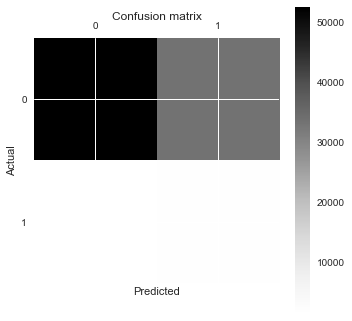

FOR NORMALIZED GINI
Best model parameter(NGINI):
{'RF__criterion': 'gini', 'RF__n_estimators': 85}
Best model (NGINI) performance:
Accuracy:0.585
Normalized GINI:0.152 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.59      0.73     86024
          1       0.05      0.57      0.09      3259

avg / total       0.94      0.59      0.71     89283
 

Confussion matrix
[[50427 35597]
 [ 1413  1846]] 

Confusion matrix visulization


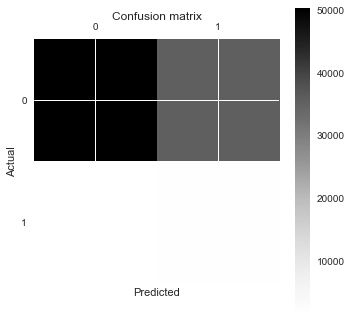

In [36]:
# Random Forest (normal)
pipeline = Pipeline([
    #('NB', MultinomialNB())
    #('KNN',neighbors.KNeighborsClassifier())
    #('tree', tree.DecisionTreeClassifier(random_state=1))
    ('RF', RandomForestClassifier(random_state=1))
    #('AB', AdaBoostClassifier(random_state=1))
    #('SVM', SVC(random_state=1))
])

parameters = {'RF__n_estimators': list(range(5,101,5)),
              'RF__criterion': ["gini","entropy"]
}

grid_search_perform(pipeline, parameters, xtrain_under, ytrain_under.target, xtest, ytest.target)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  6.5min finished


FOR ROC AUC
Best model parameter(ROC_AUC):
{'RF__criterion': 'gini', 'RF__n_estimators': 90}
Best model (ROC_AUC) performance:
Accuracy:0.609
Normalized GINI:0.144 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.61      0.75     86024
          1       0.05      0.54      0.09      3259

avg / total       0.94      0.61      0.73     89283
 

Confussion matrix
[[52606 33418]
 [ 1505  1754]] 

Confusion matrix visulization


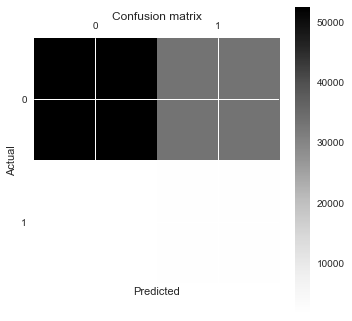

FOR NORMALIZED GINI
Best model parameter(NGINI):
{'RF__criterion': 'gini', 'RF__n_estimators': 95}
Best model (NGINI) performance:
Accuracy:0.590
Normalized GINI:0.149 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.59      0.74     86024
          1       0.05      0.56      0.09      3259

avg / total       0.94      0.59      0.71     89283
 

Confussion matrix
[[50851 35173]
 [ 1424  1835]] 

Confusion matrix visulization


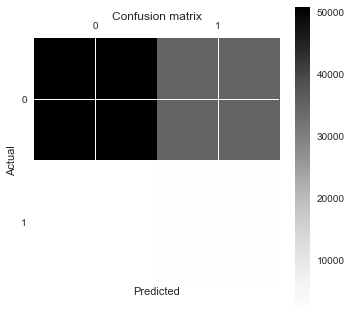

In [37]:
# Random Forest (pca)
grid_search_perform(pipeline, parameters, xtrain_pca4_under, ytrain_pca4_under.target, xtest_pca_4, ytest.target)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.8min finished


FOR ROC AUC
Best model parameter(ROC_AUC):
{'AB__n_estimators': 30}
Best model (ROC_AUC) performance:
Accuracy:0.618
Normalized GINI:0.159 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.62      0.76     86024
          1       0.05      0.54      0.09      3259

avg / total       0.94      0.62      0.73     89283
 

Confussion matrix
[[53421 32603]
 [ 1499  1760]] 

Confusion matrix visulization


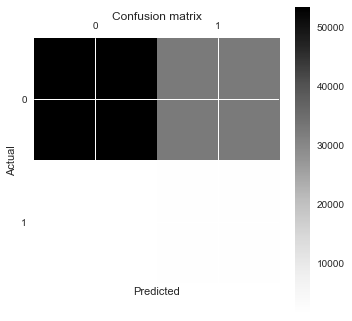

FOR NORMALIZED GINI
Best model parameter(NGINI):
{'AB__n_estimators': 40}
Best model (NGINI) performance:
Accuracy:0.619
Normalized GINI:0.157 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.62      0.76     86024
          1       0.05      0.54      0.09      3259

avg / total       0.94      0.62      0.73     89283
 

Confussion matrix
[[53546 32478]
 [ 1506  1753]] 

Confusion matrix visulization


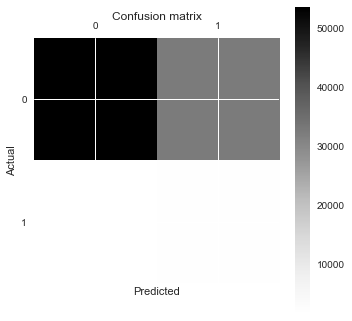

In [39]:
# Ada Boost (normal)
pipeline = Pipeline([
    #('NB', MultinomialNB())
    #('KNN',neighbors.KNeighborsClassifier())
    #('tree', tree.DecisionTreeClassifier(random_state=1))
    #('RF', RandomForestClassifier(random_state=1))
    ('AB', AdaBoostClassifier(random_state=1))
    #('SVM', SVC(random_state=1))
])

parameters = {'AB__n_estimators': list(range(5,101,5))}

grid_search_perform(pipeline, parameters, xtrain_under, ytrain_under.target, xtest, ytest.target)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.1min finished


FOR ROC AUC
Best model parameter(ROC_AUC):
{'AB__n_estimators': 30}
Best model (ROC_AUC) performance:
Accuracy:0.616
Normalized GINI:0.163 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.62      0.76     86024
          1       0.05      0.55      0.09      3259

avg / total       0.94      0.62      0.73     89283
 

Confussion matrix
[[53240 32784]
 [ 1469  1790]] 

Confusion matrix visulization


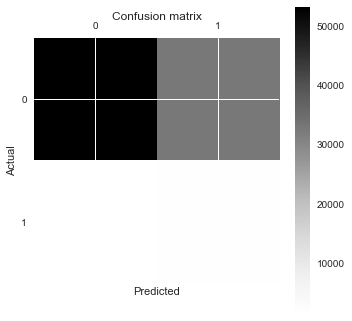

FOR NORMALIZED GINI
Best model parameter(NGINI):
{'AB__n_estimators': 60}
Best model (NGINI) performance:
Accuracy:0.617
Normalized GINI:0.159 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.62      0.76     86024
          1       0.05      0.55      0.09      3259

avg / total       0.94      0.62      0.73     89283
 

Confussion matrix
[[53336 32688]
 [ 1479  1780]] 

Confusion matrix visulization


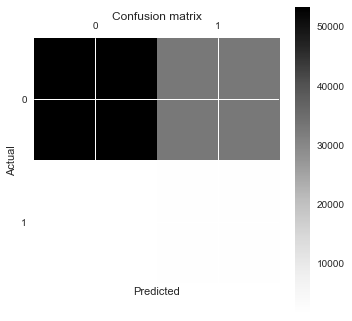

In [40]:
# Ada Boost (pca)
grid_search_perform(pipeline, parameters, xtrain_pca4_under, ytrain_pca4_under.target, xtest_pca_4, ytest.target)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   40.3s finished


FOR ROC AUC
Best model parameter(ROC_AUC):
{'tree__criterion': 'entropy', 'tree__min_samples_leaf': 60}
Best model (ROC_AUC) performance:
Accuracy:0.566
Normalized GINI:0.103 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.57      0.72     86024
          1       0.05      0.54      0.08      3259

avg / total       0.94      0.57      0.69     89283
 

Confussion matrix
[[48757 37267]
 [ 1500  1759]] 

Confusion matrix visulization


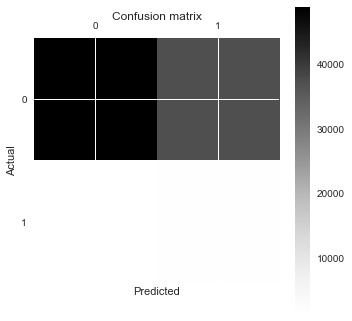

FOR NORMALIZED GINI
Best model parameter(NGINI):
{'tree__criterion': 'gini', 'tree__min_samples_leaf': 60}
Best model (NGINI) performance:
Accuracy:0.549
Normalized GINI:0.118 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.55      0.70     86024
          1       0.05      0.57      0.08      3259

avg / total       0.94      0.55      0.68     89283
 

Confussion matrix
[[47174 38850]
 [ 1410  1849]] 

Confusion matrix visulization


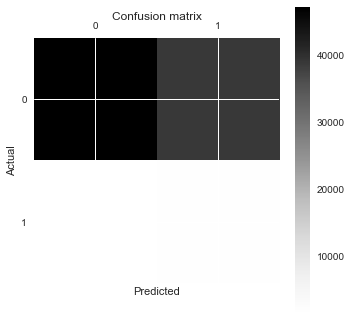

In [175]:
# Decision Tree (normal)
pipeline = Pipeline([
    #('NB', MultinomialNB())
    #('KNN',neighbors.KNeighborsClassifier())
    ('tree', tree.DecisionTreeClassifier(random_state=1))
    #('RF', RandomForestClassifier(random_state=1))
    #('AB', AdaBoostClassifier(random_state=1))
    #('SVM', SVC(random_state=1))
])

parameters = {'tree__criterion': ['entropy', 'gini'],
              'tree__min_samples_leaf':[2,4,6,8,10,12,14,16,18,20,30,40,50,60]
}

grid_search_perform(pipeline, parameters, xtrain_under, ytrain_under.target, xtest, ytest.target)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   38.5s finished


FOR ROC AUC
Best model parameter(ROC_AUC):
{'tree__criterion': 'gini', 'tree__min_samples_leaf': 60}
Best model (ROC_AUC) performance:
Accuracy:0.569
Normalized GINI:0.093 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.57      0.72     86024
          1       0.04      0.52      0.08      3259

avg / total       0.94      0.57      0.69     89283
 

Confussion matrix
[[49061 36963]
 [ 1554  1705]] 

Confusion matrix visulization


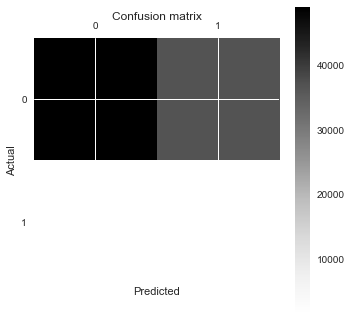

FOR NORMALIZED GINI
Best model parameter(NGINI):
{'tree__criterion': 'gini', 'tree__min_samples_leaf': 60}
Best model (NGINI) performance:
Accuracy:0.569
Normalized GINI:0.093 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.57      0.72     86024
          1       0.04      0.52      0.08      3259

avg / total       0.94      0.57      0.69     89283
 

Confussion matrix
[[49061 36963]
 [ 1554  1705]] 

Confusion matrix visulization


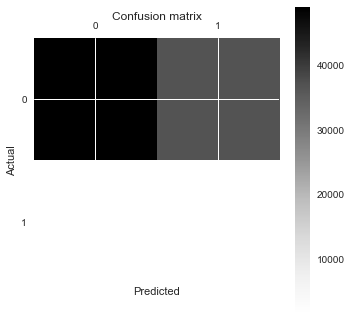

In [176]:
# Decision Tree (pca)
grid_search_perform(pipeline, parameters, xtrain_pca4_under, ytrain_pca4_under.target, xtest_pca_4, ytest.target)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   48.7s finished


FOR ROC AUC
Best model parameter(ROC_AUC):
{'tree__criterion': 'entropy', 'tree__min_samples_leaf': 120}
Best model (ROC_AUC) performance:
Accuracy:0.569
Normalized GINI:0.121 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.57      0.72     86024
          1       0.05      0.55      0.09      3259

avg / total       0.94      0.57      0.69     89283
 

Confussion matrix
[[48985 37039]
 [ 1467  1792]] 

Confusion matrix visulization


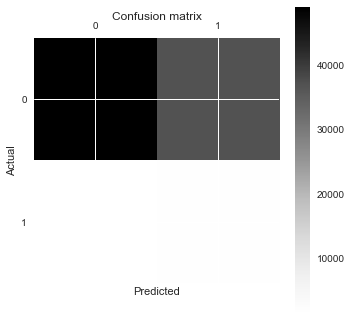

FOR NORMALIZED GINI
Best model parameter(NGINI):
{'tree__criterion': 'entropy', 'tree__min_samples_leaf': 80}
Best model (NGINI) performance:
Accuracy:0.569
Normalized GINI:0.112 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.57      0.72     86024
          1       0.05      0.54      0.08      3259

avg / total       0.94      0.57      0.70     89283
 

Confussion matrix
[[49082 36942]
 [ 1497  1762]] 

Confusion matrix visulization


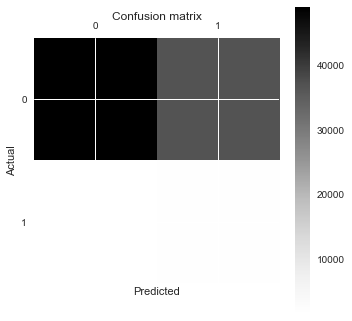

In [42]:
# Decision Tree (normal)
pipeline = Pipeline([
    #('NB', MultinomialNB())
    #('KNN',neighbors.KNeighborsClassifier())
    ('tree', tree.DecisionTreeClassifier(random_state=1))
    #('RF', RandomForestClassifier(random_state=1))
    #('AB', AdaBoostClassifier(random_state=1))
    #('SVM', SVC(random_state=1))
])

parameters = {'tree__criterion': ['entropy', 'gini'],
              'tree__min_samples_leaf':list(range(5,121,5))
}

grid_search_perform(pipeline, parameters, xtrain_under, ytrain_under.target, xtest, ytest.target)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   52.7s finished


FOR ROC AUC
Best model parameter(ROC_AUC):
{'tree__criterion': 'gini', 'tree__min_samples_leaf': 120}
Best model (ROC_AUC) performance:
Accuracy:0.535
Normalized GINI:0.116 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.53      0.69     86024
          1       0.05      0.58      0.08      3259

avg / total       0.94      0.53      0.67     89283
 

Confussion matrix
[[45834 40190]
 [ 1362  1897]] 

Confusion matrix visulization


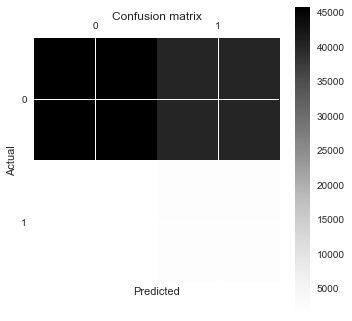

FOR NORMALIZED GINI
Best model parameter(NGINI):
{'tree__criterion': 'entropy', 'tree__min_samples_leaf': 120}
Best model (NGINI) performance:
Accuracy:0.540
Normalized GINI:0.118 

Classification report
             precision    recall  f1-score   support

          0       0.97      0.54      0.69     86024
          1       0.05      0.58      0.08      3259

avg / total       0.94      0.54      0.67     89283
 

Confussion matrix
[[46371 39653]
 [ 1383  1876]] 

Confusion matrix visulization


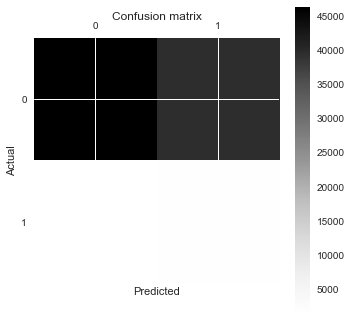

In [43]:
# Decision Tree (pca)
grid_search_perform(pipeline, parameters, xtrain_pca4_under, ytrain_pca4_under.target, xtest_pca_4, ytest.target)

## FINAL
MODEL BUILDING, SCORE BASED ON VALIDATION SET

In [65]:
# Performance of best GridSearch Model
def measure_performance2(clf, xtrain, ytrain, xtest, ytest, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.fit(xtrain,ytrain).predict(xtest) 
    if show_accuracy:
        print ("Accuracy:{0:.4f}".format(metrics.accuracy_score(ytest, y_pred)))
        print ("Normalized GINI:{0:.4f}".format(eval_gini(ytest, y_pred)[0]))
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(ytest, y_pred),"\n")
    if show_confussion_matrix:
        cm = metrics.confusion_matrix(ytest, y_pred)
        print ("Confussion matrix")
        print (cm,"\n")
        print ("Confusion matrix visulization")
        plt.matshow(cm)
        plt.title('Confusion matrix')
        plt.colorbar()
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

## Original dataset

In [56]:
# For original dataset
clf1 = MultinomialNB(alpha=1.0)
clf2 = tree.DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=120)
clf3 = RandomForestClassifier(random_state=1,criterion='gini',n_estimators=85)
clf4 = AdaBoostClassifier(random_state=1,n_estimators=30)

/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:0.7166
Normalized GINI:0.1387
Classification report
             precision    recall  f1-score   support

          0       0.97      0.73      0.83     85951
          1       0.05      0.41      0.10      3330

avg / total       0.94      0.72      0.80     89281
 

Confussion matrix
[[62628 23323]
 [ 1977  1353]] 

Confusion matrix visulization


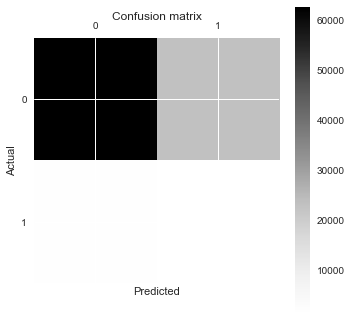

In [70]:
#nb
measure_performance2(clf1,xtrain_under,ytrain_under,xvalidate,yvalidate)

Accuracy:0.5690
Normalized GINI:0.1271
Classification report
             precision    recall  f1-score   support

          0       0.97      0.57      0.72     85951
          1       0.05      0.56      0.09      3330

avg / total       0.94      0.57      0.69     89281
 

Confussion matrix
[[48935 37016]
 [ 1466  1864]] 

Confusion matrix visulization


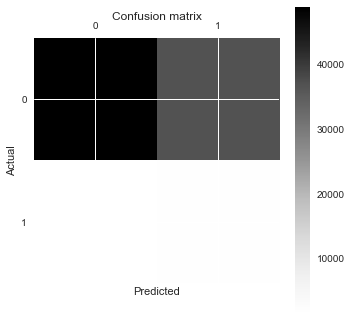

In [71]:
# DecisionTreeClassifier
measure_performance2(clf2,xtrain_under,ytrain_under,xvalidate,yvalidate)

/Users/Queena/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Accuracy:0.5842
Normalized GINI:0.1626
Classification report
             precision    recall  f1-score   support

          0       0.97      0.58      0.73     85951
          1       0.05      0.57      0.09      3330

avg / total       0.94      0.58      0.71     89281
 

Confussion matrix
[[50246 35705]
 [ 1418  1912]] 

Confusion matrix visulization


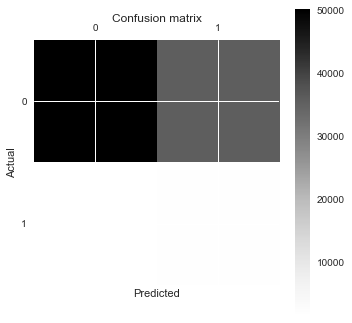

In [72]:
# RandomForestClassifier
measure_performance2(clf3,xtrain_under,ytrain_under,xvalidate,yvalidate)

/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:0.6173
Normalized GINI:0.1709
Classification report
             precision    recall  f1-score   support

          0       0.97      0.62      0.76     85951
          1       0.05      0.55      0.10      3330

avg / total       0.94      0.62      0.73     89281
 

Confussion matrix
[[53266 32685]
 [ 1483  1847]] 

Confusion matrix visulization


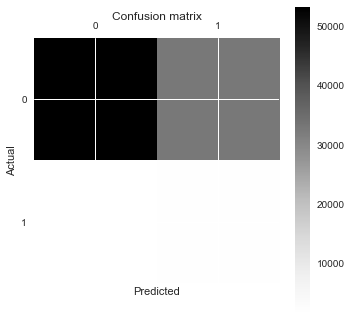

In [73]:
#AdaBoostClassifier
measure_performance2(clf4,xtrain_under,ytrain_under,xvalidate,yvalidate)

## PCA_based 

In [103]:
# For pca dataset
pcaclf1 = tree.DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=60)
pcaclf2 = RandomForestClassifier(random_state=1,criterion='gini',n_estimators=95)
pcaclf3 = AdaBoostClassifier(random_state=1,n_estimators=30)

Accuracy:0.5632
Normalized GINI:0.1006
Classification report
             precision    recall  f1-score   support

          0       0.97      0.56      0.71     85951
          1       0.05      0.54      0.08      3330

avg / total       0.94      0.56      0.69     89281
 

Confussion matrix
[[48476 37475]
 [ 1524  1806]] 

Confusion matrix visulization


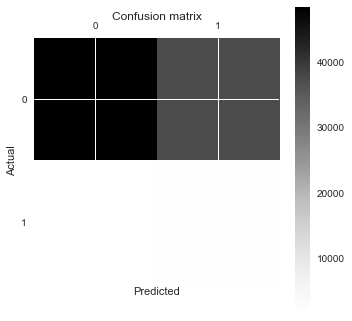

In [104]:
# DecisionTreeClassifier
measure_performance2(pcaclf1,xtrain_pca4_under,ytrain_pca4_under,xvalidate_pca_4,yvalidate)

/Users/Queena/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Accuracy:0.5857
Normalized GINI:0.1419
Classification report
             precision    recall  f1-score   support

          0       0.97      0.59      0.73     85951
          1       0.05      0.56      0.09      3330

avg / total       0.94      0.59      0.71     89281
 

Confussion matrix
[[50438 35513]
 [ 1475  1855]] 

Confusion matrix visulization


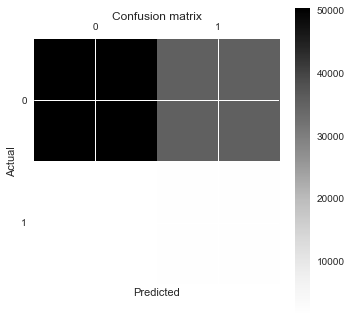

In [105]:
# RandomForestClassifier
measure_performance2(pcaclf2,xtrain_pca4_under,ytrain_pca4_under,xvalidate_pca_4,yvalidate)

/Users/Queena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:0.6159
Normalized GINI:0.1707
Classification report
             precision    recall  f1-score   support

          0       0.97      0.62      0.76     85951
          1       0.05      0.56      0.10      3330

avg / total       0.94      0.62      0.73     89281
 

Confussion matrix
[[53141 32810]
 [ 1481  1849]] 

Confusion matrix visulization


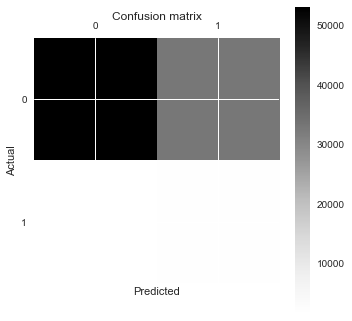

In [106]:
# AdaBoostClassifier
measure_performance2(pcaclf3,xtrain_pca4_under,ytrain_pca4_under,xvalidate_pca_4,yvalidate)